# Passagers du Titanic: exemple d'analyse univariée et bivariée 

Version du 9 juin 2022




## Importer les librairies nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import copy
import re
import csv

# Importer le fichier



In [2]:
### Lire le fichier et afficher les premières lignes

chemin = 'data/liste_passagers_titanic.csv'

obs = pd.read_csv(chemin, sep=';')

### Les deux prochaines lignes remplacent l'index par défaut 0 à n
#  avec un index de 1 à n
obs['new_col'] = range(1, len(obs) + 1)
obs.set_index('new_col', inplace=True)

obs.tail()

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex
new_col,,,,,,,,
2451,"ABĪ ĀSĪ ḤANNĀ, Mr Mansūr",27.0,3rd Class Passenger,2663\r\n£7 4s 7d,Cherbourg,,Survivor,M
2452,"ØSTBY, Miss Helen Ragnhild",22.0,1st Class Passenger,113509\r\n£61 19s 7d,Southampton,,Survivor,F
2453,"ÖDAHL, Mr Nils Martin",23.0,3rd Class Passenger,7267\r\n£9 4s 6d,Southampton,General Labourer,Dead,M
2454,"ÖHMAN, Miss Velin",22.0,3rd Class Passenger,347085\r\n£7 15s 6d,Southampton,,Survivor,F
2455,"āDAH, Mr Mauritz",30.0,3rd Class Passenger,7076\r\n£7 5s,Southampton,General Labourer,Dead,M


In [3]:
### Sélectionner seulement les lignes dont la première lettre commence par 'Z'
obs[obs['Name'].str[0].isin(['Y', 'Z'])]

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex
new_col,,,,,,,,
2435,"YASBECK, Mr Antoni",27.0,3rd Class Passenger,2659\r\n£14 9s 1d,Cherbourg,General Labourer,Dead,M
2436,"YAZBECK, Mrs Selini",15.0,3rd Class Passenger,2659\r\n£14 9s 1d,Cherbourg,,Survivor,F
2437,"YEARSLEY, Mr Harry",40.0,Victualling Crew,NaN,Southampton,First class saloon steward,Survivor,M
2438,"YOUNG, Miss Marie Grice",36.0,1st Class Passenger,17760\r\n£135 12s 8d,Cherbourg,,Survivor,F
2439,"YOUNG, Mr Francis James",32.0,Engineering Crew,NaN,Southampton,Fireman,Dead,M
2440,"YOUSSEFF (ABI SAAB), Mr Gerios",26.0,3rd Class Passenger,2685\r\n£7 4s 6d,Cherbourg,Shoemaker,Survivor,M
2441,"YOUSSIFF (SAM'AAN), Mr Gerios",45.0,3rd Class Passenger,2628\r\n£7 4s 7d,Cherbourg,,Survivor,M
2442,"YVOIS, Miss Henriette",24.0,2nd Class Passenger,248747\r\n£13,Southampton,,Dead,F
2443,"YāSUF, Mrs KÄtrÄn",23.0,3rd Class Passenger,2668\r\n£22 7s 2d,Cherbourg,,Survivor,M


In [4]:
### Inspecter les propriétés du tableau:
# les types (ou classes) des colonnes et les valeurs non-nulles
obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2455 entries, 1 to 2455
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    2455 non-null   object 
 1   Age     2426 non-null   float64
 2   Class   2455 non-null   object 
 3   Ticket  1348 non-null   object 
 4   Joined  2455 non-null   object 
 5   Job     2455 non-null   object 
 6   Fate    2455 non-null   object 
 7   Sex     2455 non-null   object 
dtypes: float64(1), object(7)
memory usage: 172.6+ KB


In [5]:
### Liste des colonnes, i.e. variables
list(obs.columns)

['Name', 'Age', 'Class', 'Ticket', 'Joined', 'Job', 'Fate', 'Sex']

# Genre

Inspecter la variable genre et vérifier s'il y a des valeurs vides (vide = null, fonction is_null(), valeur None en Python)

Variable qualitative, deux modalités

In [191]:
### Le résultat de cette méthode est qu'il n'y a pas de valeurs nulles
obs['Sex'].isnull().values.any()

False

In [192]:
### Regrouper par genre et compter les individus par valeur
genre_eff = pd.DataFrame(obs.groupby(by='Sex').size())
genre_eff.columns= ['effectif']
genre_eff.head()

,effectif
Sex,
F,493
M,1962


In [193]:
### Ajouter la fréquence
genre_eff['frequence'] = genre_eff['effectif'].apply(lambda x : (x / genre_eff['effectif'].sum()).round(2))
genre_eff

,effectif,frequence
Sex,,
F,493,0.2
M,1962,0.8


# Analyse des âges

Variable quantitative continue

In [125]:
### On crée un variable qui contient seulement la colonne
#  c'est-à-dire une pandas.Series, la série ou liste de données 'âge'
age = obs['Age']
s_age = age.sort_values() 
type(age), age.head()

(pandas.core.series.Series,
 new_col
 1    42.0
 2    21.0
 3    13.0
 4    16.0
 5    39.0
 Name: Age, dtype: float64)

### Tester s'il y a des valeurs vides

In [126]:
### Méthode permettant de savoir s'il y a des valeurs vides
age.isnull().values.any()

True

In [127]:
### Méthode permettant de savoir combienil y a de valeurs vides
age.isnull().values.sum()

29

In [133]:
### Cette méthode d'une série fournit les indicateurs
#  de tendance centrale et de dispersion
age[age.isnull() == False].describe()

count    2426.000000
mean       31.041220
std        11.833691
min         1.000000
25%        23.000000
50%        30.000000
75%        38.000000
max        74.000000
Name: Age, dtype: float64

In [134]:
### La valeur la plus fréquente
age.mode()[0]

22.0

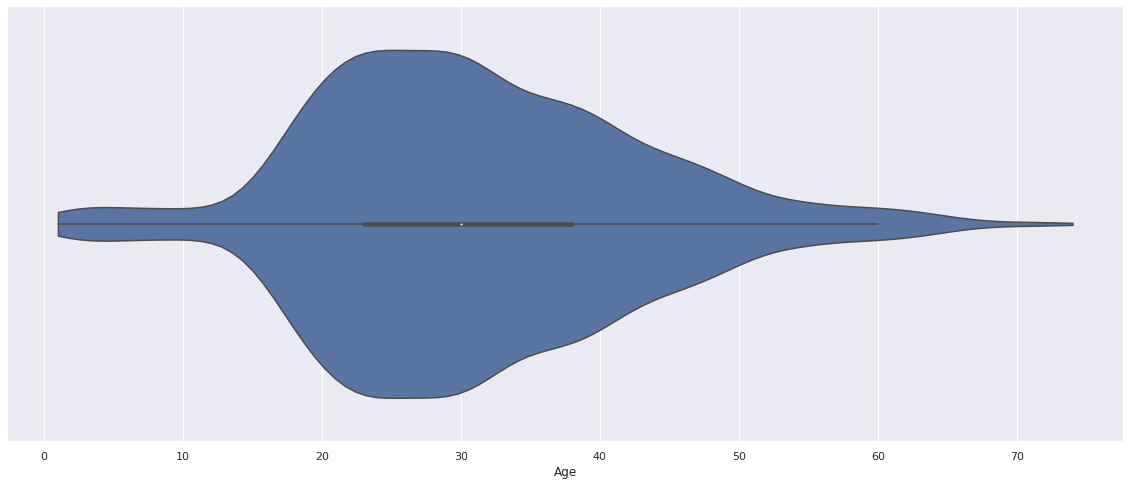

In [138]:
### Distribution des âges 

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(20, 8)})

a = obs.Age

### Avec cut = 0 ne sortent que les valeurs réellement présentes
ax = sns.violinplot(x=a, cut=0)



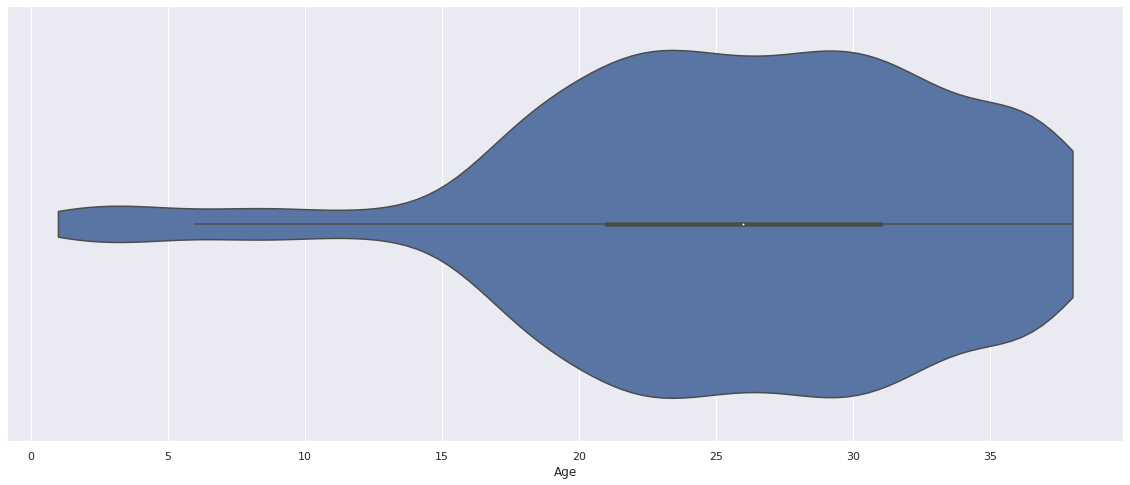

In [139]:
### Distribution des âges des plus jeunes

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(20, 8)})

a = obs.query("Age < 39").Age

ax = sns.violinplot(x=a, cut=0)



In [171]:
age_passagers = pd.DataFrame(obs.query("Class.str.contains('Class') & ~Class.str.contains('Musi')").Age)
type(age_passagers),age_passagers.head()

(pandas.core.frame.DataFrame,
           Age
 new_col      
 1        42.0
 3        13.0
 4        16.0
 5        39.0
 6        16.0)

In [141]:
age_passagers.Age.describe()

count    1319.000000
mean       29.983321
std        13.753455
min         1.000000
25%        21.000000
50%        28.000000
75%        39.000000
max        74.000000
Name: Age, dtype: float64

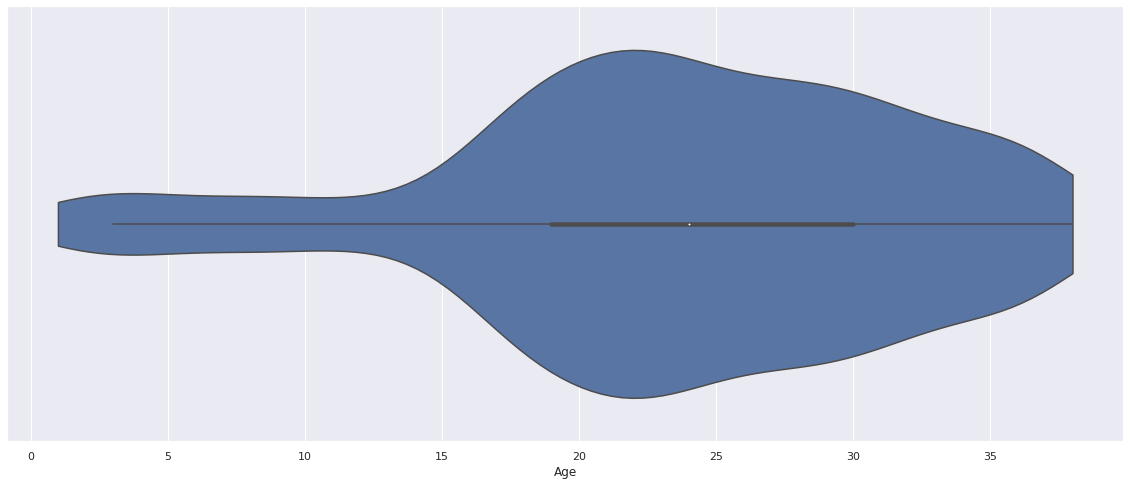

In [143]:
### Age des passager plus jeunes
sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(20, 8)})

a = age_passagers.query("Age < 39").Age

ax = sns.violinplot(x=a, cut=0)


In [144]:
age_crew = pd.DataFrame(obs.query("~Class.str.contains('Class') | Class.str.contains('Musi')").Age)
type(age_crew),age_crew

(pandas.core.frame.DataFrame,
           Age
 new_col      
 2        21.0
 11       34.0
 14       26.0
 15       20.0
 17       31.0
 ...       ...
 2434     41.0
 2437     40.0
 2439     32.0
 2446     20.0
 2447     26.0
 
 [1111 rows x 1 columns])

In [145]:
age_crew.Age.describe()

count    1107.000000
mean       32.301716
std         8.871354
min        15.000000
25%        25.500000
50%        31.000000
75%        38.000000
max        63.000000
Name: Age, dtype: float64

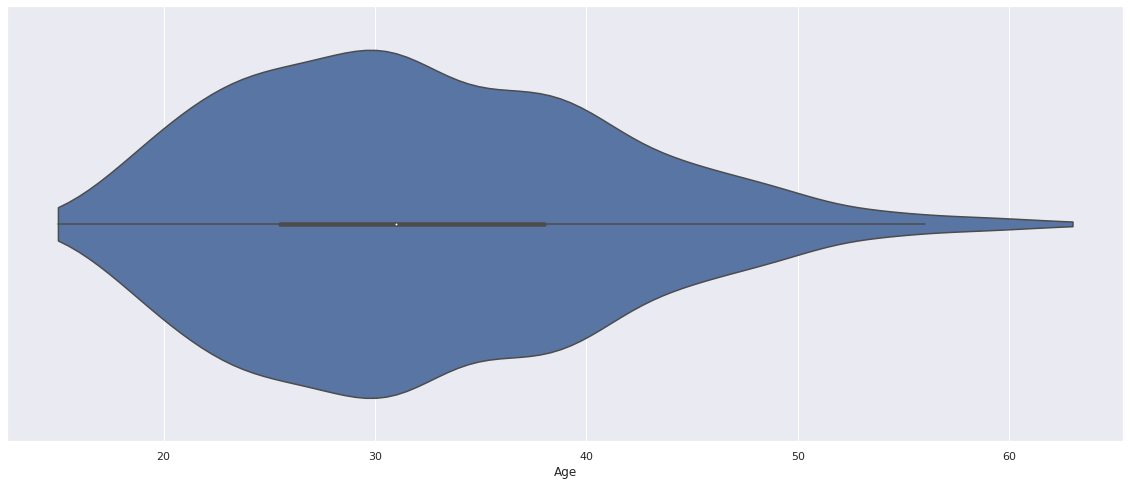

In [146]:
### Age des passager plus jeunes
sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(20, 8)})

a = age_crew.Age
# a = age_crew.query("Age < 39").Age

ax = sns.violinplot(x=a, cut=0)


# Inspecter, nettoyer les prix des billets

In [6]:
### Inspecter les valeurs de la colonne
list(obs.Ticket.head(10))

['5547\r\n£7 11s',
 nan,
 'CA2673\r\n£20 5s',
 'CA2673\r\n£20 5s',
 'CA2673\r\n£20 5s',
 '348125\r\n£7 13s',
 '348122\r\n£7 13s',
 '3381\r\n£24',
 '3381\r\n£24',
 '3101284\r\n£7 18s 6d']

In [7]:
### Utiliser le signe de retour à la ligne pour séparer les valeurs
#  Ne retenir à la sortie que le prix, non le n° de ticket1
ticket = 'CA2673\r\n£20 5s'
ticket.split('\r\n'), ticket.split('\r\n')[1]

(['CA2673', '£20 5s'], '£20 5s')

In [8]:
### Création de la fonction qui permet d'extraire le prix du billet
#  et vérifie avant qu'il s'agit d'une chaîne de caractères
#  et non d'un nombre ou vide
def split_prix (ticket):
    result = ''
    try:
        result = ticket.split('\r\n')[1]
    except:
        result = 'verifier'
    return result  

### Exemple d'utilisation
split_prix(ticket)

'£20 5s'

In [9]:
### Appliquer la fonction et ajouter une colonne
obs['Prix'] = obs['Ticket'].apply(split_prix)
obs.head()

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix
new_col,,,,,,,,,
1,"ABBING, Mr Anthony",42.0,3rd Class Passenger,5547\r\n£7 11s,Southampton,Blacksmith,Dead,M,£7 11s
2,"ABBOTT, Mr Ernest Owen",21.0,Victualling Crew,NaN,Southampton,Lounge Pantry Steward,Dead,M,verifier
3,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,Scholar,Dead,M,£20 5s
4,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,Jeweller,Dead,M,£20 5s
5,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,,Survivor,F,£20 5s


In [10]:
### Combien de modalités a la variable 'Prix'
#  qui en l'état est une variable qualitative
vc = obs['Prix'].value_counts()
len(vc)

286

In [11]:
vc

verifier      1135
£8 1s           60
£13             59
£7 15s          55
£7 17s 11d      51
              ... 
£7 15s 8d        1
£15 11s 7d       1
£49 10s          1
£7 2s 10d        1
£7 17s 6d        1
Name: Prix, Length: 286, dtype: int64

In [12]:
### Les valeurs qui ont posé problème à la fonction
obs[obs['Prix']=='verifier'].Ticket.value_counts()

250654    8
370160    5
239853    3
112058    2
112050    1
112051    1
7         1
239854    1
112059    1
239855    1
112052    1
19972     1
50        1
239856    1
Name: Ticket, dtype: int64

In [13]:
### Inspecter un exemple
obs[obs['Ticket'] == '250654']

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix
new_col,,,,,,,,,
270,"BRAILEY, Mr William Theodore Ronald",24.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier
282,"BRICOUX, Mr Roger Marie",20.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier
438,"CLARKE, Mr John Frederick Preston",28.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier
949,"HARTLEY, Mr Wallace Henry",33.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier
1062,"HUME, Mr John Law",21.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier
1247,"KRINS, Mr Georges Alexandre",23.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier
2197,"TAYLOR, Mr Percy Cornelius",40.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier
2422,"WOODWARD, Mr John Wesley",32.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier


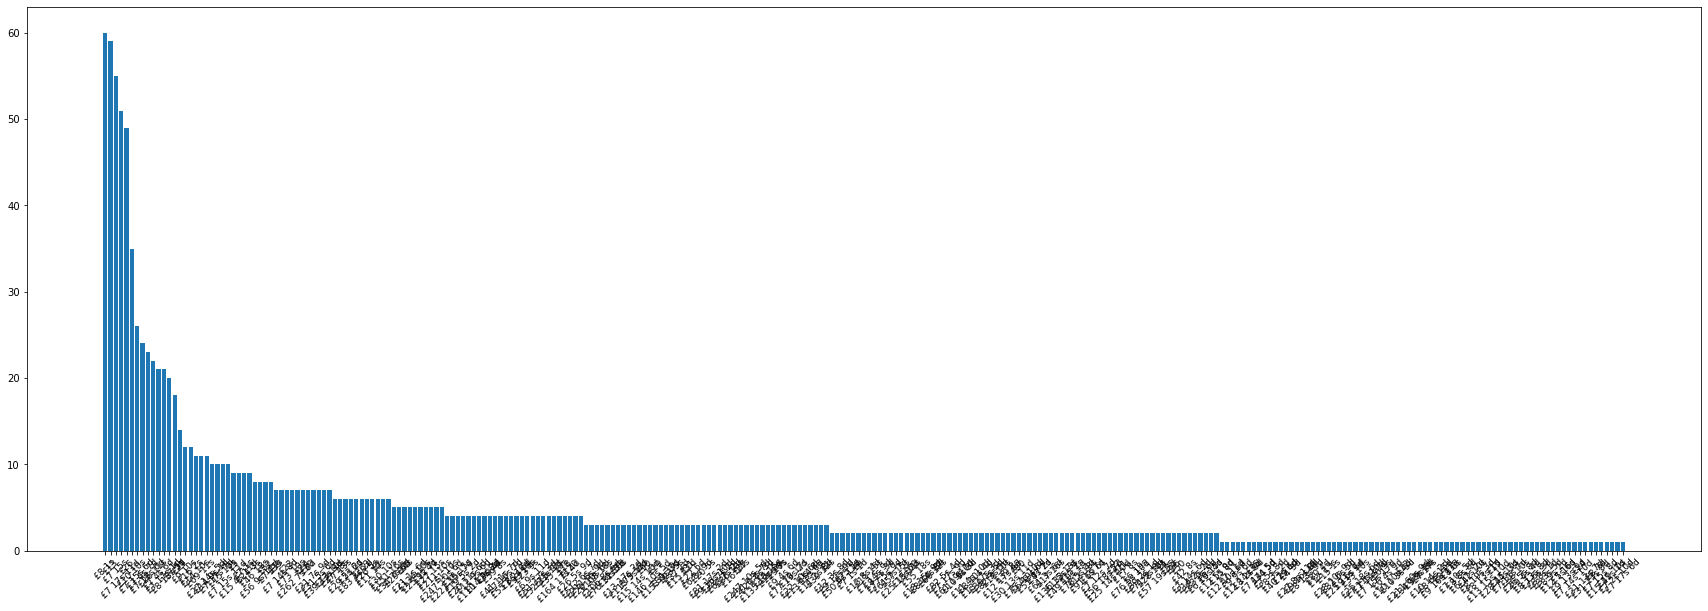

In [14]:
### Représentation graphique, sans les effectifs de 'vérifier'
# Noter la dispersion
fig = plt.figure(figsize=[30,10])
plt.bar(vc[1:].index,vc[1:].values)
plt.xticks(rotation=45, size=9)
plt.show()

In [15]:
lp = list(vc.tail().index)
lp

['£7 15s 8d', '£15 11s 7d', '£49 10s', '£7 2s 10d', '£7 17s 6d']

## Conversion prix de chaîne de caractères vers valeurs décimales

12 pence in a shilling and 20 shillings a £ sterling, or 240 pence make a £

Lsd: https://en.wikipedia.org/wiki/%C2%A3sd 

Lsd: spoken as "pounds, shillings and pence" or pronounced /ɛl.ɛsˈdiː/ ell-ess-DEE

£7 11s 7d 

In [16]:
### Exemple de calcul de conversion de décimale
7 + 17/20 + 6/240 

7.875

In [17]:
### Les valeurs à convertir
list(vc.index)[:10]

['verifier',
 '£8 1s',
 '£13',
 '£7 15s',
 '£7 17s 11d',
 '£26',
 '£10 10s',
 '£7 15s 6d',
 '£7 4s 7d',
 '£7 18s 6d']

In [18]:
### Données exemple
s1 = '£8   s'
s2 = '£46 18s'
s3 = '£56 9s 11d'
l = [s1,s2,s3]

In [19]:
### Création de la fonction
def lsd_to_decimal(p):
    r = re.compile('\d{0,3}')
    if p != 'verif' :
        l = r.findall(p)
        li = [int(t) for t in l if t.isnumeric()]


        if len(li) == 3:
            try:
                d = li[2]/240
            except:
                print(li, p)
            try:
                s = li[1]/20
            except:
                print(li, p)
            L = li[0]

            out= L + s + d

        elif len(li) == 2:
            try:
                s = li[1]/20
            except:
                print(li, p)
            L = li[0]

            out= L + s

        elif len(li) == 1:

            L = li[0]

            out= L

        else:
            out = 77777

        rr = round(out,3)

        

    else:
        rr = 99999
    
    return rr
   
## test de la fonction sur une valeur    
lsd_to_decimal(s1),lsd_to_decimal(s2),lsd_to_decimal(s3)    

(8, 46.9, 56.496)

In [20]:
### Application à la table
obs['Prix_dec'] = obs['Prix'].apply(lsd_to_decimal)
obs

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix,Prix_dec
new_col,,,,,,,,,,
1,"ABBING, Mr Anthony",42.0,3rd Class Passenger,5547\r\n£7 11s,Southampton,Blacksmith,Dead,M,£7 11s,7.550
2,"ABBOTT, Mr Ernest Owen",21.0,Victualling Crew,NaN,Southampton,Lounge Pantry Steward,Dead,M,verifier,77777.000
3,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,Scholar,Dead,M,£20 5s,20.250
4,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,Jeweller,Dead,M,£20 5s,20.250
5,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,,Survivor,F,£20 5s,20.250
...,...,...,...,...,...,...,...,...,...,...
2451,"ABĪ ĀSĪ ḤANNĀ, Mr Mansūr",27.0,3rd Class Passenger,2663\r\n£7 4s 7d,Cherbourg,,Survivor,M,£7 4s 7d,7.229
2452,"ØSTBY, Miss Helen Ragnhild",22.0,1st Class Passenger,113509\r\n£61 19s 7d,Southampton,,Survivor,F,£61 19s 7d,61.979
2453,"ÖDAHL, Mr Nils Martin",23.0,3rd Class Passenger,7267\r\n£9 4s 6d,Southampton,General Labourer,Dead,M,£9 4s 6d,9.225


In [21]:
### Nombre d'erreurs / valeurs à vérifier globalement
len(obs[obs['Prix_dec'] == 99999])

0

In [22]:
### Nombre d'erreurs de conversion / valeurs à vérifier
len(obs[obs['Prix_dec'] == 77777])

1135

In [23]:
### Distribution des prix décimaux
#  Noter qu'on exclut les individus qui n'ont pas de billet
obs[obs['Prix_dec'] != 77777].Prix_dec.describe()

count    1320.000000
mean       33.150223
std        51.820787
min         1.000000
25%         7.896000
50%        14.454000
75%        31.068750
max       512.329000
Name: Prix_dec, dtype: float64

In [24]:
### Vérification de la valeur qui pose problème: 'verifier'
obs.Prix_dec.value_counts()

77777.000    1135
8.050          60
13.000         59
7.750          55
7.896          51
             ... 
12.525          1
8.350           1
7.783           1
15.579          1
7.875           1
Name: Prix_dec, Length: 283, dtype: int64

(1.0, 512.329)

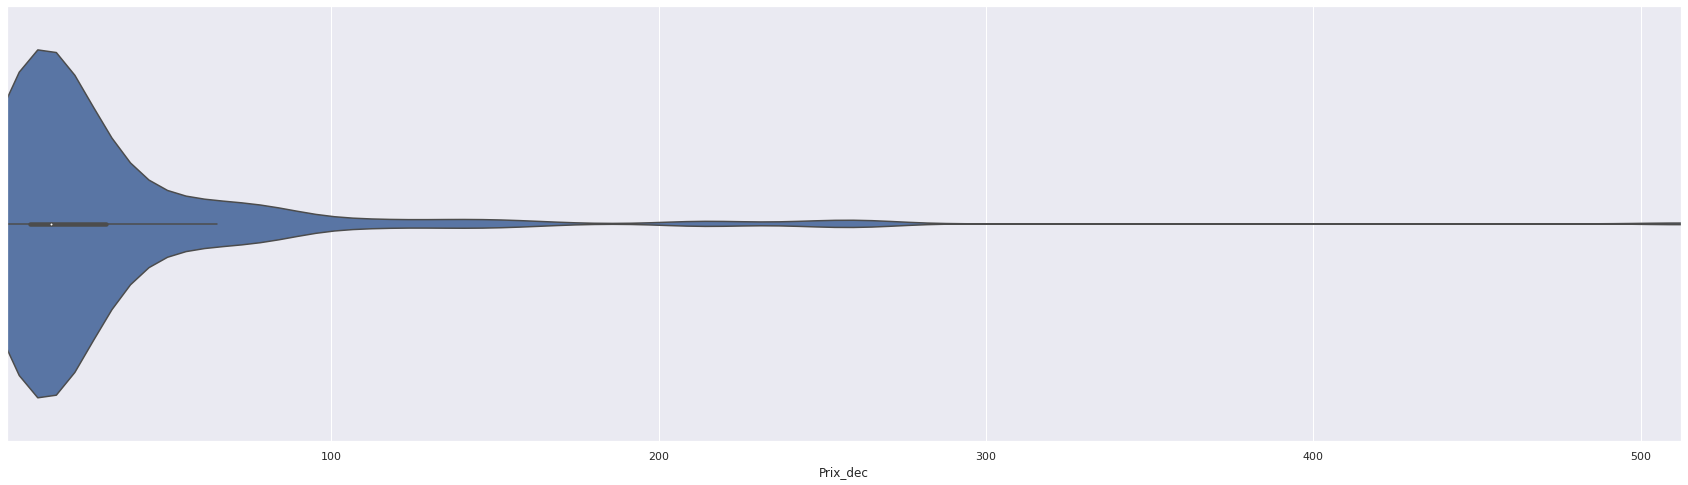

In [25]:
### Distribution et densité des prix

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

a = obs[obs['Prix_dec'] != 77777]["Prix_dec"]

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))



(1.0, 31.683)

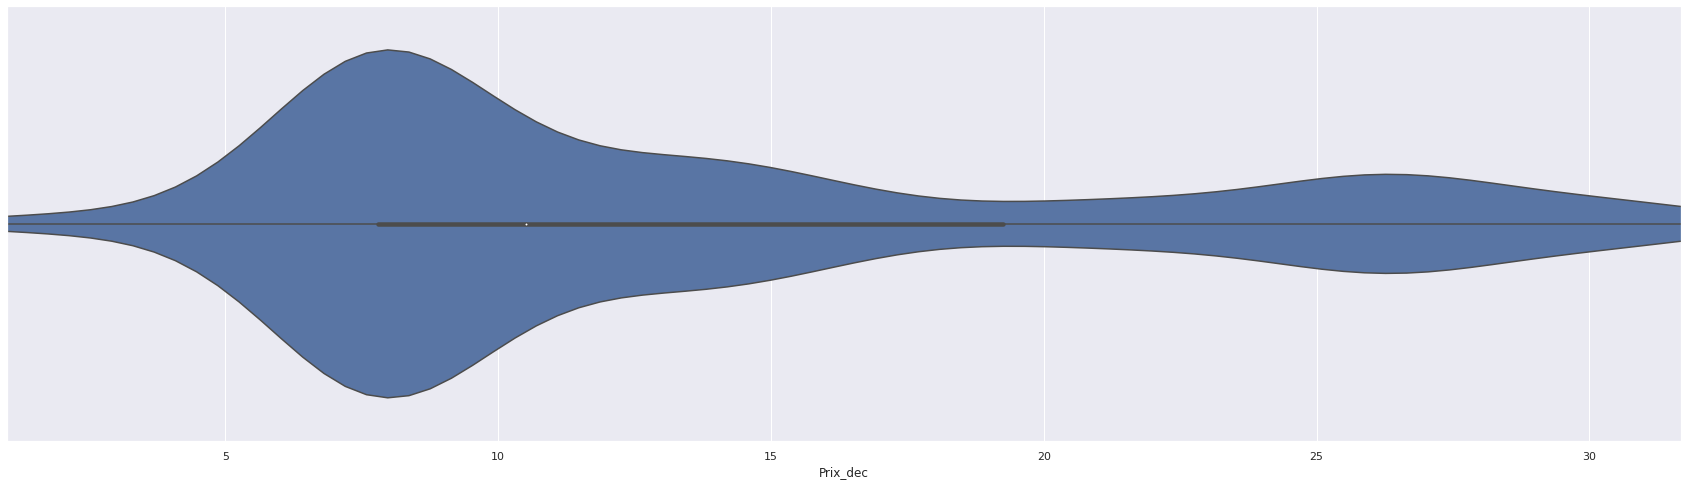

In [26]:
### Limiter aux trois premiers quartiles

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

a = obs[obs['Prix_dec'] < 32]["Prix_dec"]

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))



# Class

In [33]:
### Modalités et distribution par classe
#  Noter le nettoyage des retours à la ligne
#  Noter que certains passager traversent la Manche 
#  et ne continuent pas : 'cross channel'
class_l = obs.Class.apply(lambda x : x.replace('\r\n', ' ')).value_counts()
class_l.sort_index()

1st Class Passenger                            286
1st Class Passenger Cross Channel Passenger     22
1st Class Passenger H&W Guarantee Group          4
1st Class Passenger Servant                     38
2nd Class Passenger                            265
2nd Class Passenger Cross Channel Passenger     10
2nd Class Passenger H&W Guarantee Group          5
2nd Class Passenger Musician                     8
2nd Class Passenger Servant                      5
3rd Class Passenger                            709
Deck Crew                                       89
Deck Crew Titanic Officers                      10
Engineering Crew                               502
Restaurant Staff                                69
Victualling Crew                               429
Victualling Crew Postal Clerk                    4
Name: Class, dtype: int64

In [34]:
obs[obs['Class'].str.contains('Musician')]

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix,Prix_dec
new_col,,,,,,,,,,
270,"BRAILEY, Mr William Theodore Ronald",24.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
282,"BRICOUX, Mr Roger Marie",20.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
438,"CLARKE, Mr John Frederick Preston",28.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
949,"HARTLEY, Mr Wallace Henry",33.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
1062,"HUME, Mr John Law",21.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
1247,"KRINS, Mr Georges Alexandre",23.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
2197,"TAYLOR, Mr Percy Cornelius",40.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
2422,"WOODWARD, Mr John Wesley",32.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0


In [35]:
### Personnes à bord sans besoin de billet (crew, staff, etc.)
class_l[class_l.index > '3rd Class Passenger'].values.sum(), class_l[class_l.index > '3rd Class Passenger'].sort_index()

(1103,
 Deck Crew                         89
 Deck Crew Titanic Officers        10
 Engineering Crew                 502
 Restaurant Staff                  69
 Victualling Crew                 429
 Victualling Crew Postal Clerk      4
 Name: Class, dtype: int64)

In [36]:
crew_l = obs[obs['Prix_dec'] == 77777].Class.apply(lambda x : x.replace('\r\n', ' ')).value_counts()
sum(crew_l),crew_l.sort_index()

(1135,
 1st Class Passenger                              5
 1st Class Passenger Cross Channel Passenger      2
 1st Class Passenger H&W Guarantee Group          4
 1st Class Passenger Servant                      2
 2nd Class Passenger Cross Channel Passenger      1
 2nd Class Passenger H&W Guarantee Group          5
 2nd Class Passenger Musician                     8
 3rd Class Passenger                              5
 Deck Crew                                       89
 Deck Crew Titanic Officers                      10
 Engineering Crew                               502
 Restaurant Staff                                69
 Victualling Crew                               429
 Victualling Crew Postal Clerk                    4
 Name: Class, dtype: int64)

In [37]:
### Filtre sur deux colonnes, syntaxe normale
obs[(obs['Class'].str.contains('Class')) & (obs['Prix_dec'] == 77777)].head()

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix,Prix_dec
new_col,,,,,,,,,,
63,"ANDREWS, Mr Thomas",39.0,1st Class Passenger\r\nH&W Guarantee Group,112050,Belfast,Shipbuilder,Dead,M,verifier,77777.0
270,"BRAILEY, Mr William Theodore Ronald",24.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
282,"BRICOUX, Mr Roger Marie",20.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
358,"CAMPBELL, Mr William Henry",21.0,2nd Class Passenger\r\nCross Channel Passenger,239853,Belfast,,Dead,M,verifier,77777.0
378,"CARRUTHERS, Mr Francis",NaN,1st Class Passenger,NaN,Belfast,Civil Servant,Survivor,M,verifier,77777.0


In [38]:
### Filtre sur deux colonnes, syntaxe 'query' plus compacte
probleme = obs.query("Class.str.contains('Class') & ~Class.str.contains('Music') & Prix_dec == 77777")
print(len(probleme))

### Ce sont des passagers dont la valeur du ticket n'est pas renseigné
probleme.tail()

24


,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix,Prix_dec
new_col,,,,,,,,,,
2145,"STOREY, Mr Thomas",59.0,3rd Class Passenger,370160,Southampton,Seaman,Dead,M,verifier,77777.0
2221,"THOMPSON, Mr Joey",NaN,1st Class Passenger\r\nH&W Guarantee Group,NaN,Belfast,Painter & Decorator,Survivor,M,verifier,77777.0
2263,"TÖRNQUIST, Mr William Henry",26.0,3rd Class Passenger,370160,Southampton,Seaman,Survivor,M,verifier,77777.0
2327,"WATSON, Mr Ennis Hastings",19.0,2nd Class Passenger\r\nH&W Guarantee Group,239856,Belfast,Apprentice Electrician,Dead,M,verifier,77777.0
2385,"WILDING, Mr Edward",NaN,1st Class Passenger,NaN,Belfast,Naval Architect,Survivor,M,verifier,77777.0


In [39]:
### Les passagers
passengers_l = obs[(obs['Class'].str.contains('Class')) & (~obs['Class'].str.contains('Musi'))]\
        .Class.apply(lambda x : x.replace('\r\n', ' ')).value_counts()
sum(passengers_l),passengers_l.sort_index()

(1344,
 1st Class Passenger                            286
 1st Class Passenger Cross Channel Passenger     22
 1st Class Passenger H&W Guarantee Group          4
 1st Class Passenger Servant                     38
 2nd Class Passenger                            265
 2nd Class Passenger Cross Channel Passenger     10
 2nd Class Passenger H&W Guarantee Group          5
 2nd Class Passenger Servant                      5
 3rd Class Passenger                            709
 Name: Class, dtype: int64)

In [40]:
### Les passagers qui font la traversée, sans musiciens, syntaxe compacte, avec problème concernant le prix
passengers_l = obs.query("Class.str.contains('Class') & ~Class.str.contains('Musi|Cross') & Prix_dec == 77777") \
        .Class.apply(lambda x : x.replace('\r\n', ' ')).value_counts()
sum(passengers_l),passengers_l.sort_index()

(21,
 1st Class Passenger                        5
 1st Class Passenger H&W Guarantee Group    4
 1st Class Passenger Servant                2
 2nd Class Passenger H&W Guarantee Group    5
 3rd Class Passenger                        5
 Name: Class, dtype: int64)

In [41]:
### Les passagers, même critère que avant, mais sans valeur renseignée du billet
#  noter que '&' représente la condition 'and'
passengers_l = obs.query("Class.str.contains('Class') & ~Class.str.contains('Musi|Cross')") \
        .Class.apply(lambda x : x.replace('\r\n', ' ')).value_counts()
sum(passengers_l),passengers_l.sort_index()

(1312,
 1st Class Passenger                        286
 1st Class Passenger H&W Guarantee Group      4
 1st Class Passenger Servant                 38
 2nd Class Passenger                        265
 2nd Class Passenger H&W Guarantee Group      5
 2nd Class Passenger Servant                  5
 3rd Class Passenger                        709
 Name: Class, dtype: int64)

In [42]:
### Personnel à bord, '|' exprime la condition 'or'
passengers_l = obs.query("Class.str.contains('Musi') | ~Class.str.contains('Class|Cross')") \
        .Class.apply(lambda x : x.replace('\r\n', ' ')).value_counts()
sum(passengers_l),passengers_l.sort_index()

(1111,
 2nd Class Passenger Musician       8
 Deck Crew                         89
 Deck Crew Titanic Officers        10
 Engineering Crew                 502
 Restaurant Staff                  69
 Victualling Crew                 429
 Victualling Crew Postal Clerk      4
 Name: Class, dtype: int64)

# Analyse des prix en fonction de la classe

In [43]:
### Les passagers, même critère que avant, mais sans valeur renseignée du billet
#  noter que '&' représente la condition 'and'
passengers_df = obs.query("Class.str.contains('Class') & ~Class.str.contains('Musi|Cross') & ~Class.str.contains('Guar|Serv') & Prix_dec != 77777")
len(passengers_df),passengers_df.head()

(1250,
                                   Name   Age                Class  \
 new_col                                                             
 1                   ABBING, Mr Anthony  42.0  3rd Class Passenger   
 3             ABBOTT, Mr Eugene Joseph  13.0  3rd Class Passenger   
 4           ABBOTT, Mr Rossmore Edward  16.0  3rd Class Passenger   
 5        ABBOTT, Mrs Rhoda Mary 'Rosa'  39.0  3rd Class Passenger   
 6           ABELSETH, Miss Karen Marie  16.0  3rd Class Passenger   
 
                    Ticket       Joined           Job      Fate Sex    Prix  \
 new_col                                                                      
 1          5547\r\n£7 11s  Southampton  Blacksmith        Dead   M  £7 11s   
 3        CA2673\r\n£20 5s  Southampton     Scholar        Dead   M  £20 5s   
 4        CA2673\r\n£20 5s  Southampton    Jeweller        Dead   M  £20 5s   
 5        CA2673\r\n£20 5s  Southampton                Survivor   F  £20 5s   
 6        348125\r\n£7 13s 

In [44]:
passengers_df.Class.value_counts().sort_index()

1st Class Passenger    281
2nd Class Passenger    265
3rd Class Passenger    704
Name: Class, dtype: int64

In [45]:
passengers_df['class_code'] = passengers_df['Class'].apply(lambda x: int(str(x)[0]))

/tmp/ipykernel_130129/2430813102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passengers_df['class_code'] = passengers_df['Class'].apply(lambda x: int(str(x)[0]))


In [46]:
passengers_df.head()

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix,Prix_dec,class_code
new_col,,,,,,,,,,,
1,"ABBING, Mr Anthony",42.0,3rd Class Passenger,5547\r\n£7 11s,Southampton,Blacksmith,Dead,M,£7 11s,7.55,3
3,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,Scholar,Dead,M,£20 5s,20.25,3
4,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,Jeweller,Dead,M,£20 5s,20.25,3
5,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,,Survivor,F,£20 5s,20.25,3
6,"ABELSETH, Miss Karen Marie",16.0,3rd Class Passenger,348125\r\n£7 13s,Southampton,,Survivor,F,£7 13s,7.65,3


In [123]:
passengers_df.class_code.value_counts().sort_index()

1    281
2    265
3    704
Name: class_code, dtype: int64

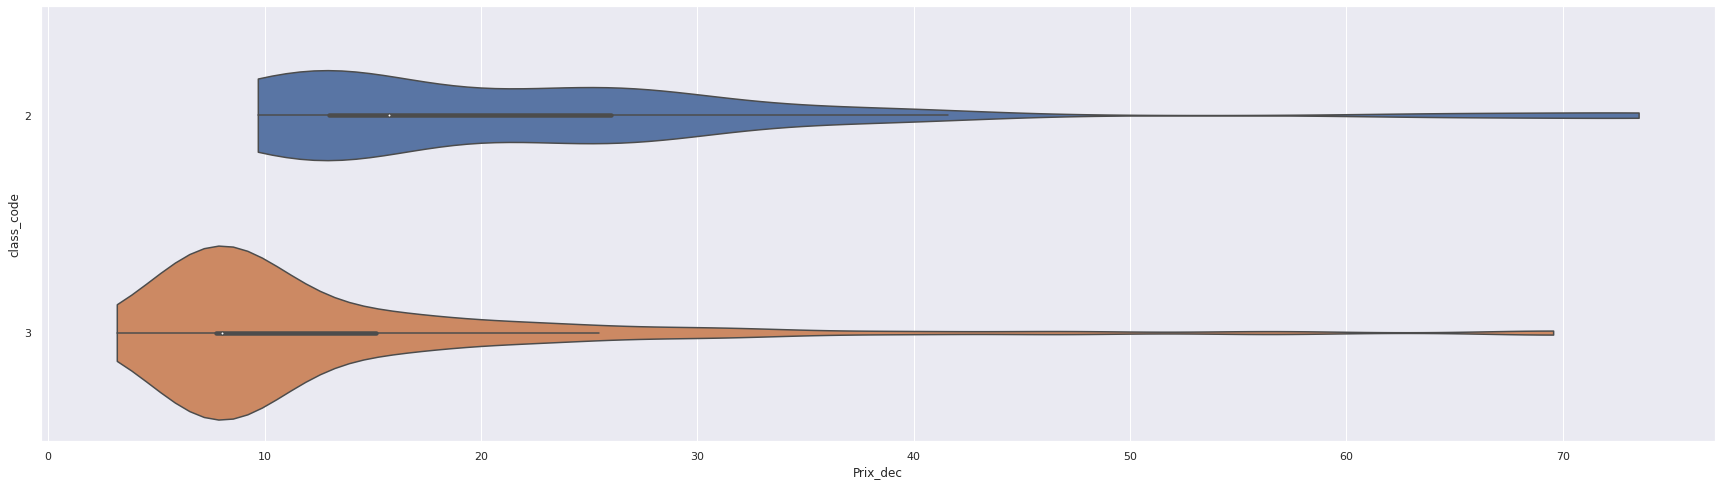

In [47]:
sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

ax = sns.violinplot(x='Prix_dec', y ='class_code', data = passengers_df[passengers_df.class_code.isin([3,2])]\
                    .sort_values('class_code',ascending=False), orient='h', cut=0)



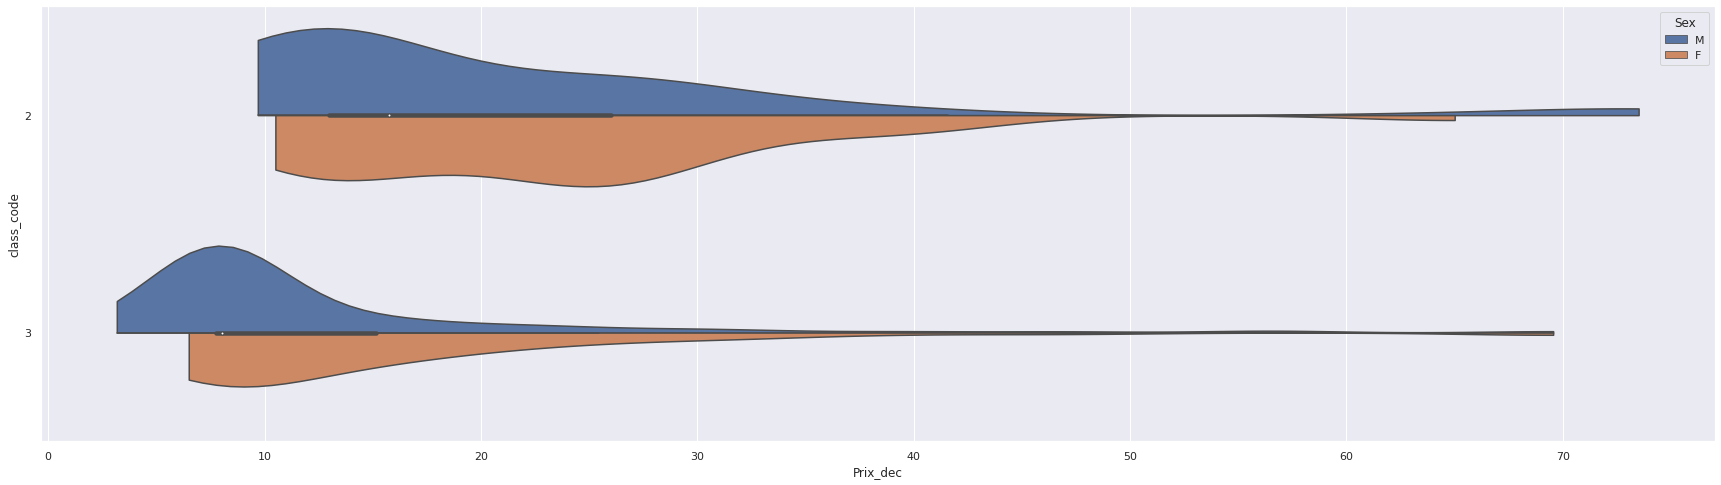

In [67]:
### Comparaison des prix par genre en 2e et 3e classe

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

ax = sns.violinplot(x='Prix_dec', y ='class_code', hue='Sex', split=True, \
                    data = passengers_df[passengers_df.class_code.isin([3,2])]\
                    .sort_values('class_code',ascending=False), orient='h', cut=0)



In [48]:
### distribution des passagers de première classe

passengers_df[passengers_df['class_code'] == 1]['Prix_dec'].describe()

count    281.000000
mean      80.674374
std       71.613234
min        5.000000
25%       30.500000
50%       57.000000
75%       89.104000
max      512.329000
Name: Prix_dec, dtype: float64

In [68]:
### distribution des passagers de troisième classe

passengers_df[passengers_df['class_code'] == 3]['Prix_dec'].describe()

count    704.000000
mean      13.343956
std       11.483012
min        3.171000
25%        7.750000
50%        8.050000
75%       15.136500
max       69.550000
Name: Prix_dec, dtype: float64

In [50]:
### distribution des passagers de première classe

passengers_df[passengers_df['class_code'] == 1]['Age'].describe()

count    281.000000
mean      39.775801
std       13.978156
min        2.000000
25%       29.000000
50%       40.000000
75%       49.000000
max       71.000000
Name: Age, dtype: float64

# Comparaison age et prix billet classe par classe

In [157]:
filtered_obs = passengers_df[(passengers_df.Age > 0) & (passengers_df.Age.isnull() == False) & (passengers_df.Prix_dec > 0 ) & (passengers_df.Prix_dec < 5000)]
filtered_obs.head(), filtered_obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1248 entries, 1 to 2455
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1248 non-null   object 
 1   Age         1248 non-null   float64
 2   Class       1248 non-null   object 
 3   Ticket      1248 non-null   object 
 4   Joined      1248 non-null   object 
 5   Job         1248 non-null   object 
 6   Fate        1248 non-null   object 
 7   Sex         1248 non-null   object 
 8   Prix        1248 non-null   object 
 9   Prix_dec    1248 non-null   float64
 10  class_code  1248 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 117.0+ KB


(                                  Name   Age                Class  \
 new_col                                                             
 1                   ABBING, Mr Anthony  42.0  3rd Class Passenger   
 3             ABBOTT, Mr Eugene Joseph  13.0  3rd Class Passenger   
 4           ABBOTT, Mr Rossmore Edward  16.0  3rd Class Passenger   
 5        ABBOTT, Mrs Rhoda Mary 'Rosa'  39.0  3rd Class Passenger   
 6           ABELSETH, Miss Karen Marie  16.0  3rd Class Passenger   
 
                    Ticket       Joined           Job      Fate Sex    Prix  \
 new_col                                                                      
 1          5547\r\n£7 11s  Southampton  Blacksmith        Dead   M  £7 11s   
 3        CA2673\r\n£20 5s  Southampton     Scholar        Dead   M  £20 5s   
 4        CA2673\r\n£20 5s  Southampton    Jeweller        Dead   M  £20 5s   
 5        CA2673\r\n£20 5s  Southampton                Survivor   F  £20 5s   
 6        348125\r\n£7 13s  Southa

Coeff. de Pearsons: -0.1079
Coeff. de Spearman: -0.03756415356557462


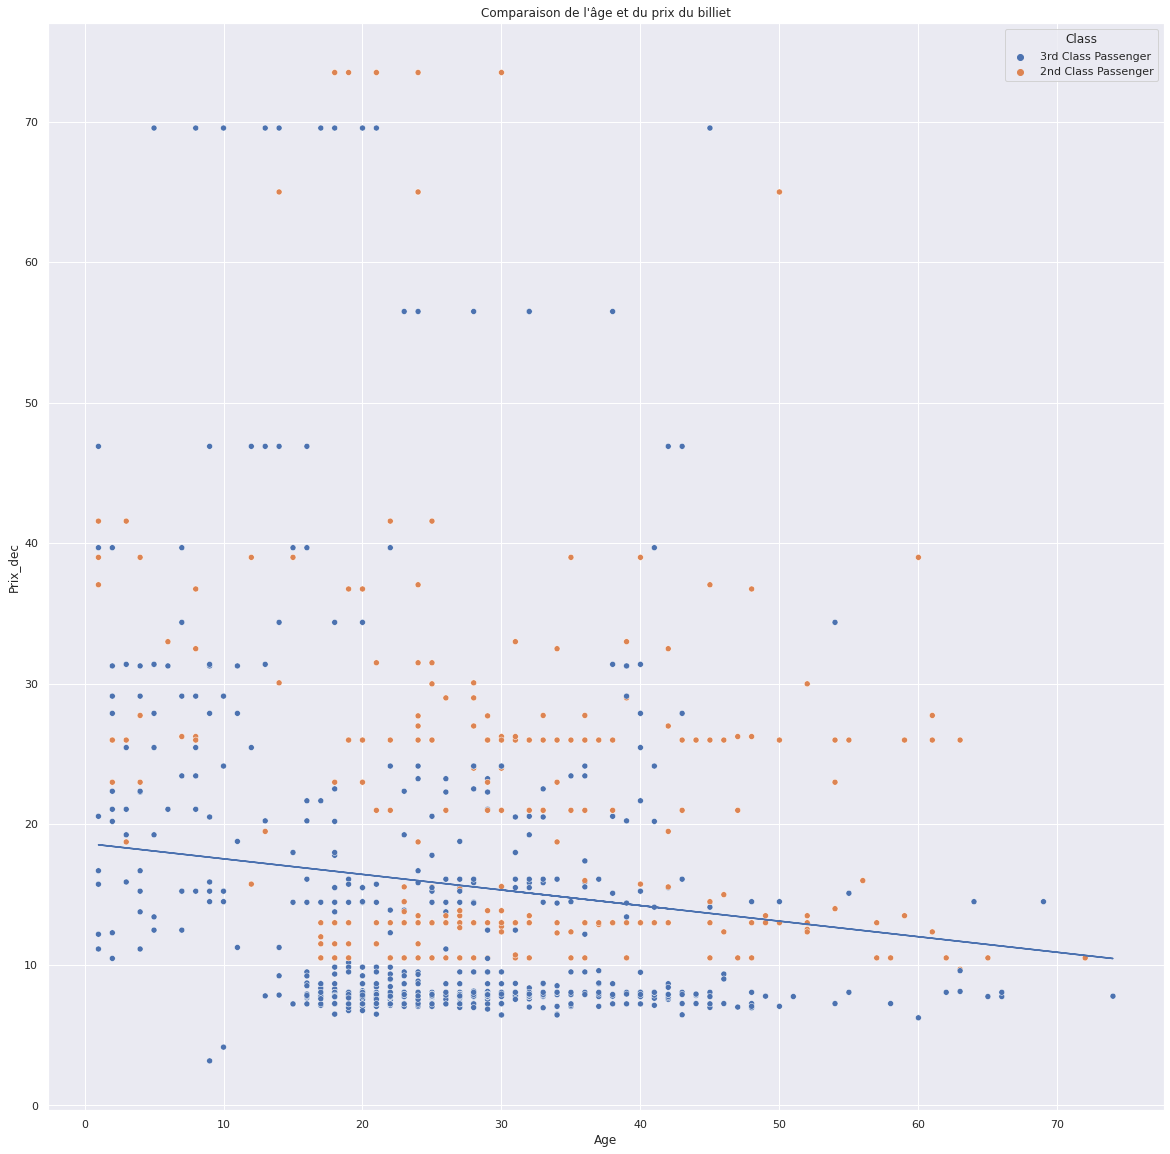

In [159]:
## Nuage de points avec droite de régression
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html

df_p = filtered_obs[filtered_obs.class_code.isin([2,3])]  ## modifier la valeur 1,2,3 et inspecter le résultat

x = np.array(df_p['Age'])
y = np.array(df_p['Prix_dec'])
hue = np.array(df_p['Class'])



plt.rcParams["figure.figsize"] = [20,20]

sns.scatterplot( x = 'Age', 
                 y = 'Prix_dec', 
                 data = df_p, 
                 hue = 'Class')

#plt.plot(x, y, 'o')
plt.title("Comparaison de l'âge et du prix du billiet")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

print('Coeff. de Pearsons: {}'.format(np.corrcoef([x,y])[1][0].round(4)))
corr_spear = df_p[['Age','Prix_dec']].corr(method="spearman")
print('Coeff. de Spearman: {}'.format(corr_spear.iloc[0,1]))
plt.show()

# Analyse des métiers

In [174]:
jobs_vc = pd.DataFrame(obs.Job.value_counts()[1:])
jobs_vc.reset_index(inplace = True)
jobs_vc.columns = ['Job', 'effectif']
jobs_vc

,Job,effectif
0,Fireman,264
1,General Labourer,159
2,Trimmer,125
3,Able Seaman,56
4,Saloon Steward,52
...,...,...
376,Boots,1
377,Boatswain Mate,1
378,Assistant Smoke Room Steward (1st class),1
379,Cinematographer,1


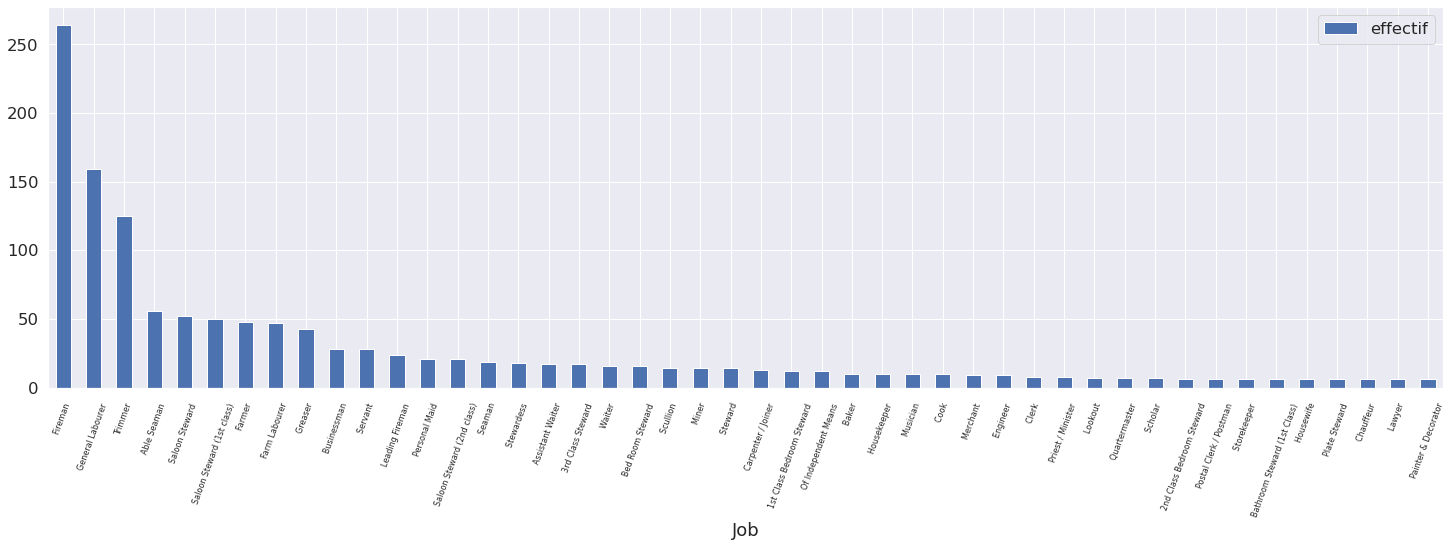

In [176]:
### Affichage des métiers de tous les embarqués
ax = jobs_vc.query("effectif > 5").plot.bar(x='Job', y='effectif', rot=70, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 8)

## Métiers des passagers

In [177]:
### Modalités et effectifs 
vcp_df =  passengers_df[passengers_df.Job.apply(lambda x : len(str(x)) > 1)]
vcp = vcp_df.Job.value_counts()
vcp

General Labourer      159
Farmer                 48
Farm Labourer          47
Businessman            28
Servant                17
                     ... 
Cab Driver              1
Rubber Merchant         1
Missionary              1
Messenger               1
Carman                  1
Name: Job, Length: 146, dtype: int64

In [178]:
###  Distribution des effectifs des 146 métiers
vcp.describe()

count    146.000000
mean       4.349315
std       14.334233
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      159.000000
Name: Job, dtype: float64

In [179]:
### Les métiers les plus fréquents
vcp[:30]

General Labourer                      159
Farmer                                 48
Farm Labourer                          47
Businessman                            28
Servant                                17
Miner                                  14
Seaman                                 12
Of Independent Means                   12
Carpenter / Joiner                     11
Housekeeper                            10
Merchant                                9
Engineer                                9
Priest / Minister                       8
Scholar                                 7
Baker                                   7
Lawyer                                  6
Housewife                               6
Clerk                                   6
Mason                                   5
Painter & Decorator                     5
Gentleman                               5
Manufacturer                            5
Stockbroker                             5
Shoemaker                         

## Codage des métiers des passagers


In [165]:
### Exporter le fichier en CSV pour pouvoir l'éditer
chemin = 'data/metiers_passagers.csv'
jobs_vc.to_csv(chemin, sep='\t')

#### Créer des classes dans le fichier

* Créer un copie du fichier .csv avec Excel ou Calc, appelée "metiers_passagers_code.csv"
* Ajouter une colonne après 'occupation' et l'appeler 'code'
* Nommer la colonne de l'index: idx
* Regrouper les métiers en 5-10 classes principales, ne mettant le code ou classe dans la colonne 'code'
* Enregistrer et réimporter le fichier

In [193]:
### Importer le fichier CSV avec les codes
chemin_code = 'data/metiers_passagers_code.csv'
jobs_vcc = pd.read_csv(chemin_code, sep='\t', index_col='idx')
jobs_vcc

,Job,code_occupation,effectif
idx,,,
0,General Labourer,ouvrier,159
1,Farmer,paysan,48
2,Farm Labourer,paysan,47
3,Servant,serviteur,28
4,Businessman,commerçant,28
...,...,...,...
153,Theatre Manager,autres,1
154,Domestic Kitchen Servant,autres,1
155,Cook (Personal),autres,1


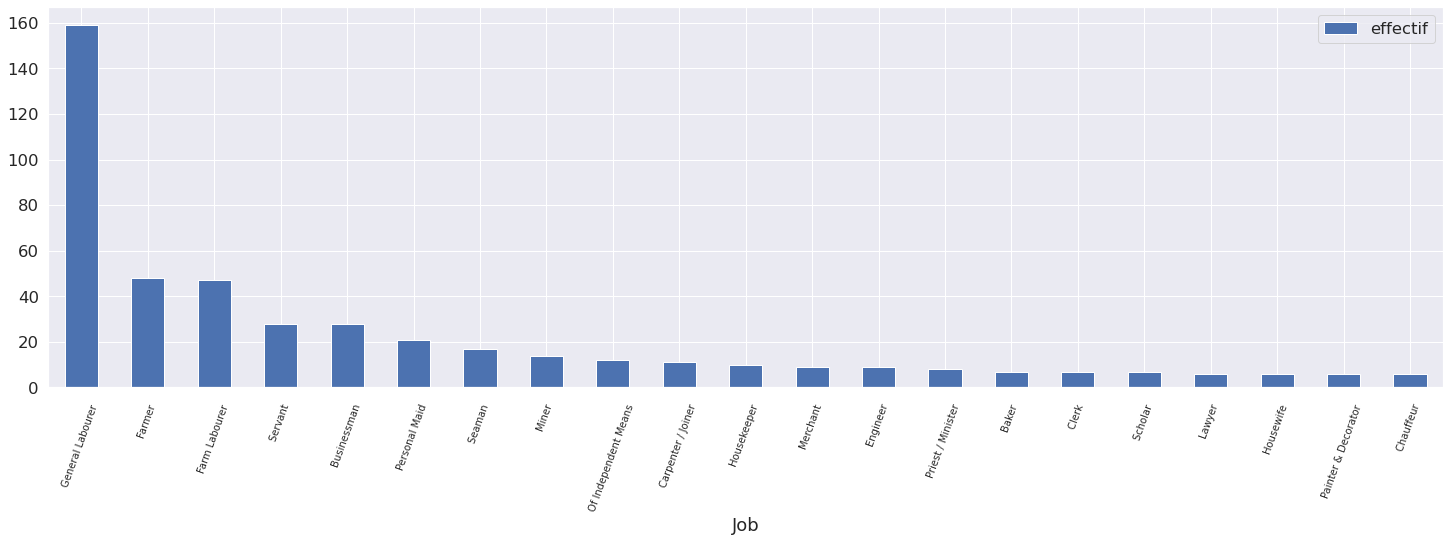

In [190]:
### Affichage des métiers
ax = jobs_vcc.query("effectif > 5").plot.bar(x='Job', y='effectif', rot=70, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 10)

In [191]:
grp_jobs_vcc = jobs_vcc.groupby('code_occupation').sum('effectif').sort_values(by='effectif', ascending=False)
grp_jobs_vcc.reset_index(inplace=True)
grp_jobs_vcc

,code_occupation,effectif
0,ouvrier,209
1,autres,135
2,paysan,95
3,serviteur,73
4,cadre et prof. libérale,47
5,commerçant,37
6,artisan,30
7,élite,20
8,cadre inférieur,17
9,marin,17


[]

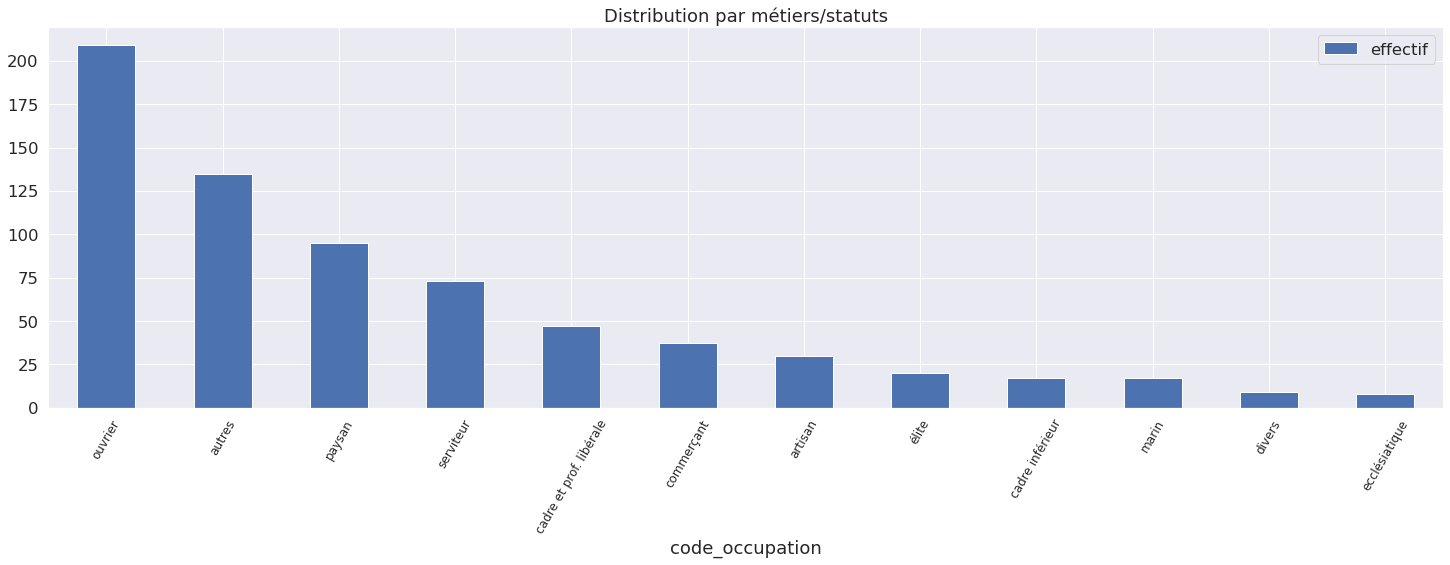

In [192]:
### Affichage des métiers et status
#  noter que dans le fichier exemple tout n'a pas été codé, cf. code 'autres'
ax = grp_jobs_vcc.plot.bar(x = 'code_occupation', y='effectif', rot=60, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 12)
ax.set_title('Distribution par métiers/statuts')
ax.plot()

In [195]:
### Ajouter les codes des métiers aux données des passagers
vcp_df_mg = vcp_df.merge(jobs_vcc)
vcp_df_mg

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix,Prix_dec,class_code,code_occupation,effectif
0,"ABBING, Mr Anthony",42.0,3rd Class Passenger,5547\r\n£7 11s,Southampton,Blacksmith,Dead,M,£7 11s,7.550,3,artisan,3
1,"DAVISON, Mr Thomas Henry",32.0,3rd Class Passenger,386525\r\n£16 2s,Southampton,Blacksmith,Dead,M,£16 2s,16.100,3,artisan,3
2,"FORD, Mr Edward Watson",18.0,3rd Class Passenger,6608\r\n£34 7s 6d,Southampton,Blacksmith,Dead,M,£34 7s 6d,34.375,3,artisan,3
3,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,Scholar,Dead,M,£20 5s,20.250,3,cadre et prof. libérale,7
4,"BROWN, Miss Edith Eileen",15.0,2nd Class Passenger,29750\r\n£39,Southampton,Scholar,Survivor,F,£39,39.000,2,cadre et prof. libérale,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,"WHILEMS, Mr Charles",31.0,2nd Class Passenger,244270\r\n£13,Southampton,Factory Foreman,Survivor,M,£13,13.000,2,autres,1
631,"WIDENER, Mr Harry Elkins",27.0,1st Class Passenger,113503\r\n£211 10s,Southampton,Bibliophile,Dead,M,£211 10s,211.500,1,autres,1
632,"WILLIAMS, Mr Charles Eugene",23.0,2nd Class Passenger,244373\r\n£13,Southampton,Sportsman,Survivor,M,£13,13.000,2,autres,2
633,"WILLIAMS, Mr Richard Norris II",21.0,1st Class Passenger,17597\r\n£61 7s 7d,Cherbourg,Sportsman,Survivor,M,£61 7s 7d,61.379,1,autres,2


In [197]:
### Vérification : métiers de l' "élite"
vcp_df_mg[vcp_df_mg.code_occupation == 'élite'].head()

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix,Prix_dec,class_code,code_occupation,effectif
332,"BEATTIE, Mr Thomson",36.0,1st Class Passenger,13050\r\n£75 4s 10d,Southampton,Landowner,Dead,M,£75 4s 10d,75.242,1,élite,3
333,"DUFF GORDON, Sir Cosmo Edmund",49.0,1st Class Passenger,11755\r\n£39 12s,Cherbourg,Landowner,Survivor,M,£39 12s,39.600,1,élite,3
334,"ROWE, Mr Alfred G.",59.0,1st Class Passenger,113790\r\n£26 11s,Southampton,Landowner,Dead,M,£26 11s,26.550,1,élite,3
435,"CARDEZA, Mr Thomas Drake Martinez",36.0,1st Class Passenger,17755\r\n£512 6s 7d,Cherbourg,Gentleman,Survivor,M,£512 6s 7d,512.329,1,élite,5
436,"LAMB, Mr John J.",31.0,2nd Class Passenger,240261\r\n£10 14s 2d,Queenstown,Gentleman,Dead,M,£10 14s 2d,10.708,2,élite,5


## Distribution (sous forme de densité) du prix du billet par classe d'occupation

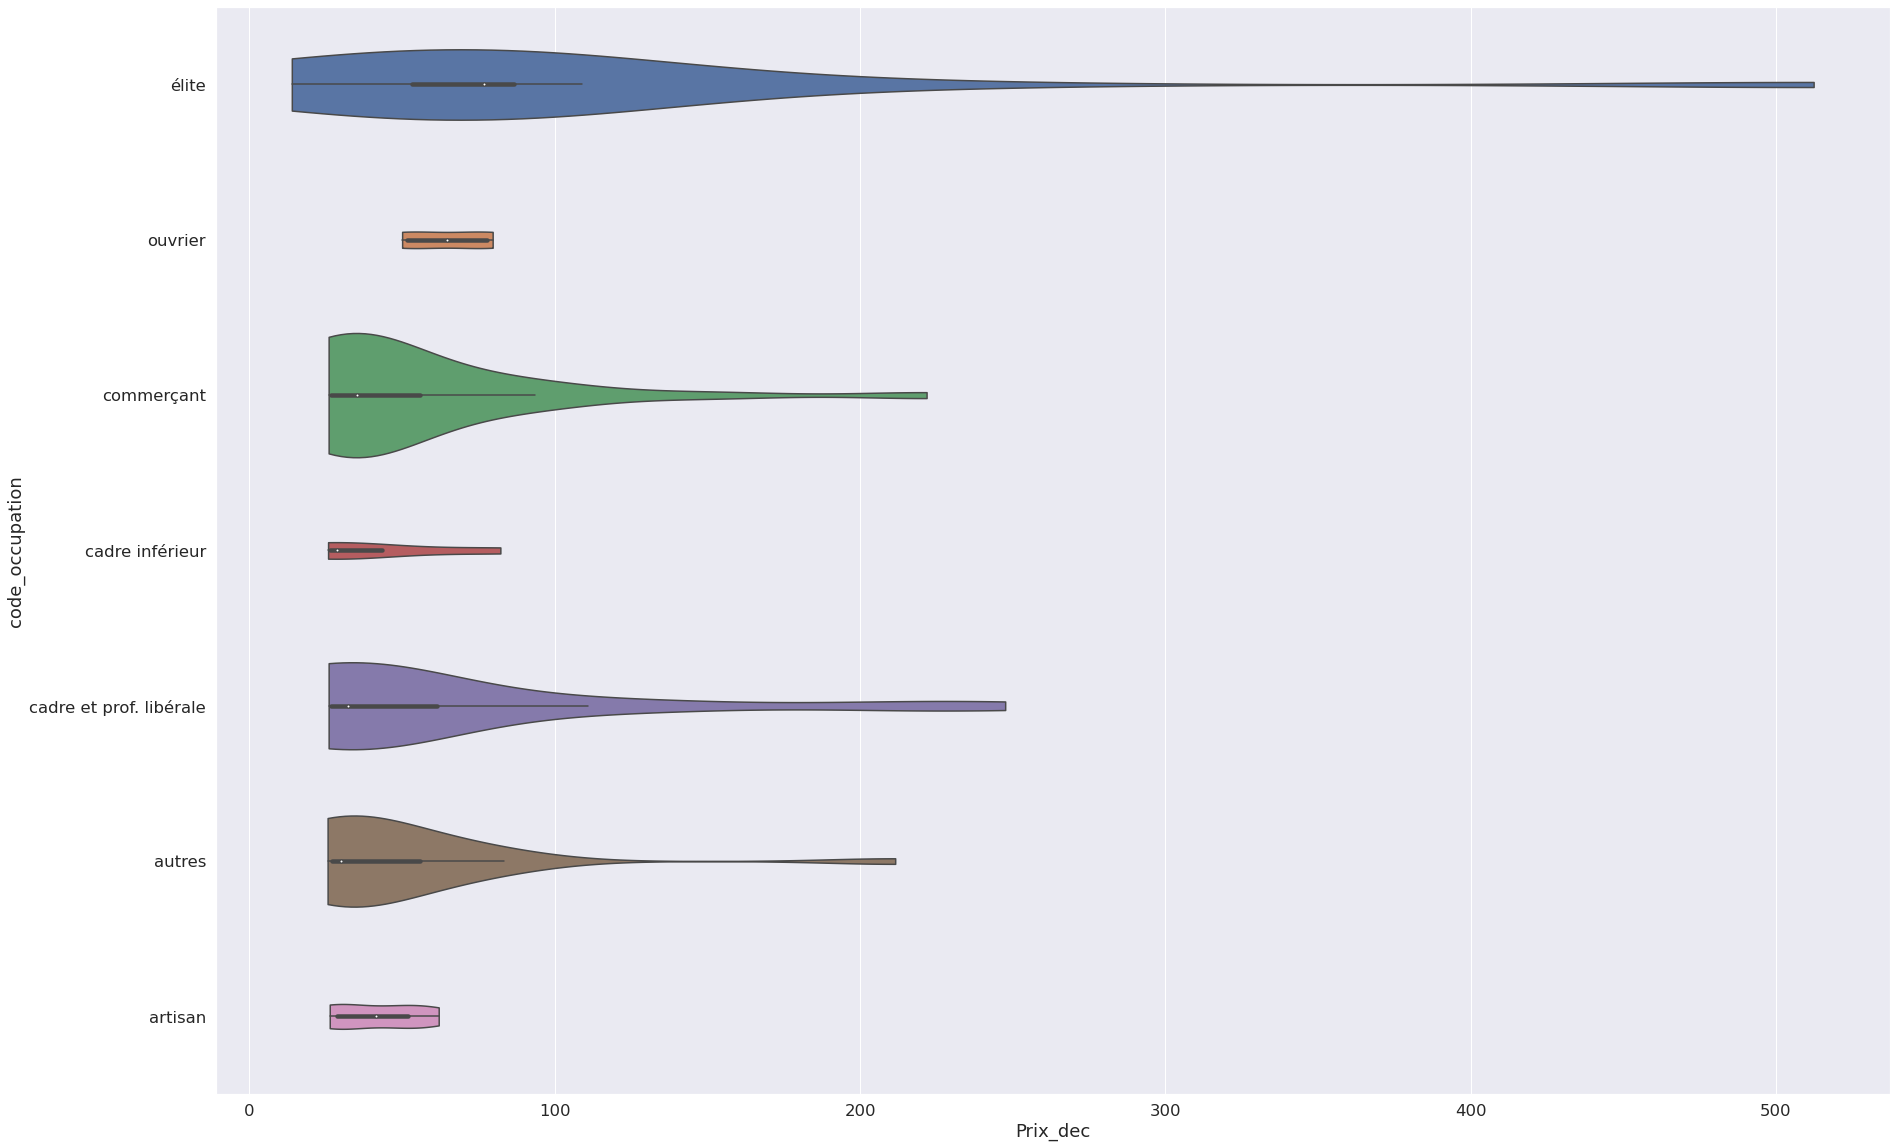

In [201]:
sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 20)}, font_scale = 1.5)

ax = sns.violinplot(x='Prix_dec', y ='code_occupation', data = vcp_df_mg[vcp_df_mg.class_code.isin([1])]\
                    .sort_values('code_occupation',ascending=False), orient='h', cut=0 , scale='count', fontsize=18)



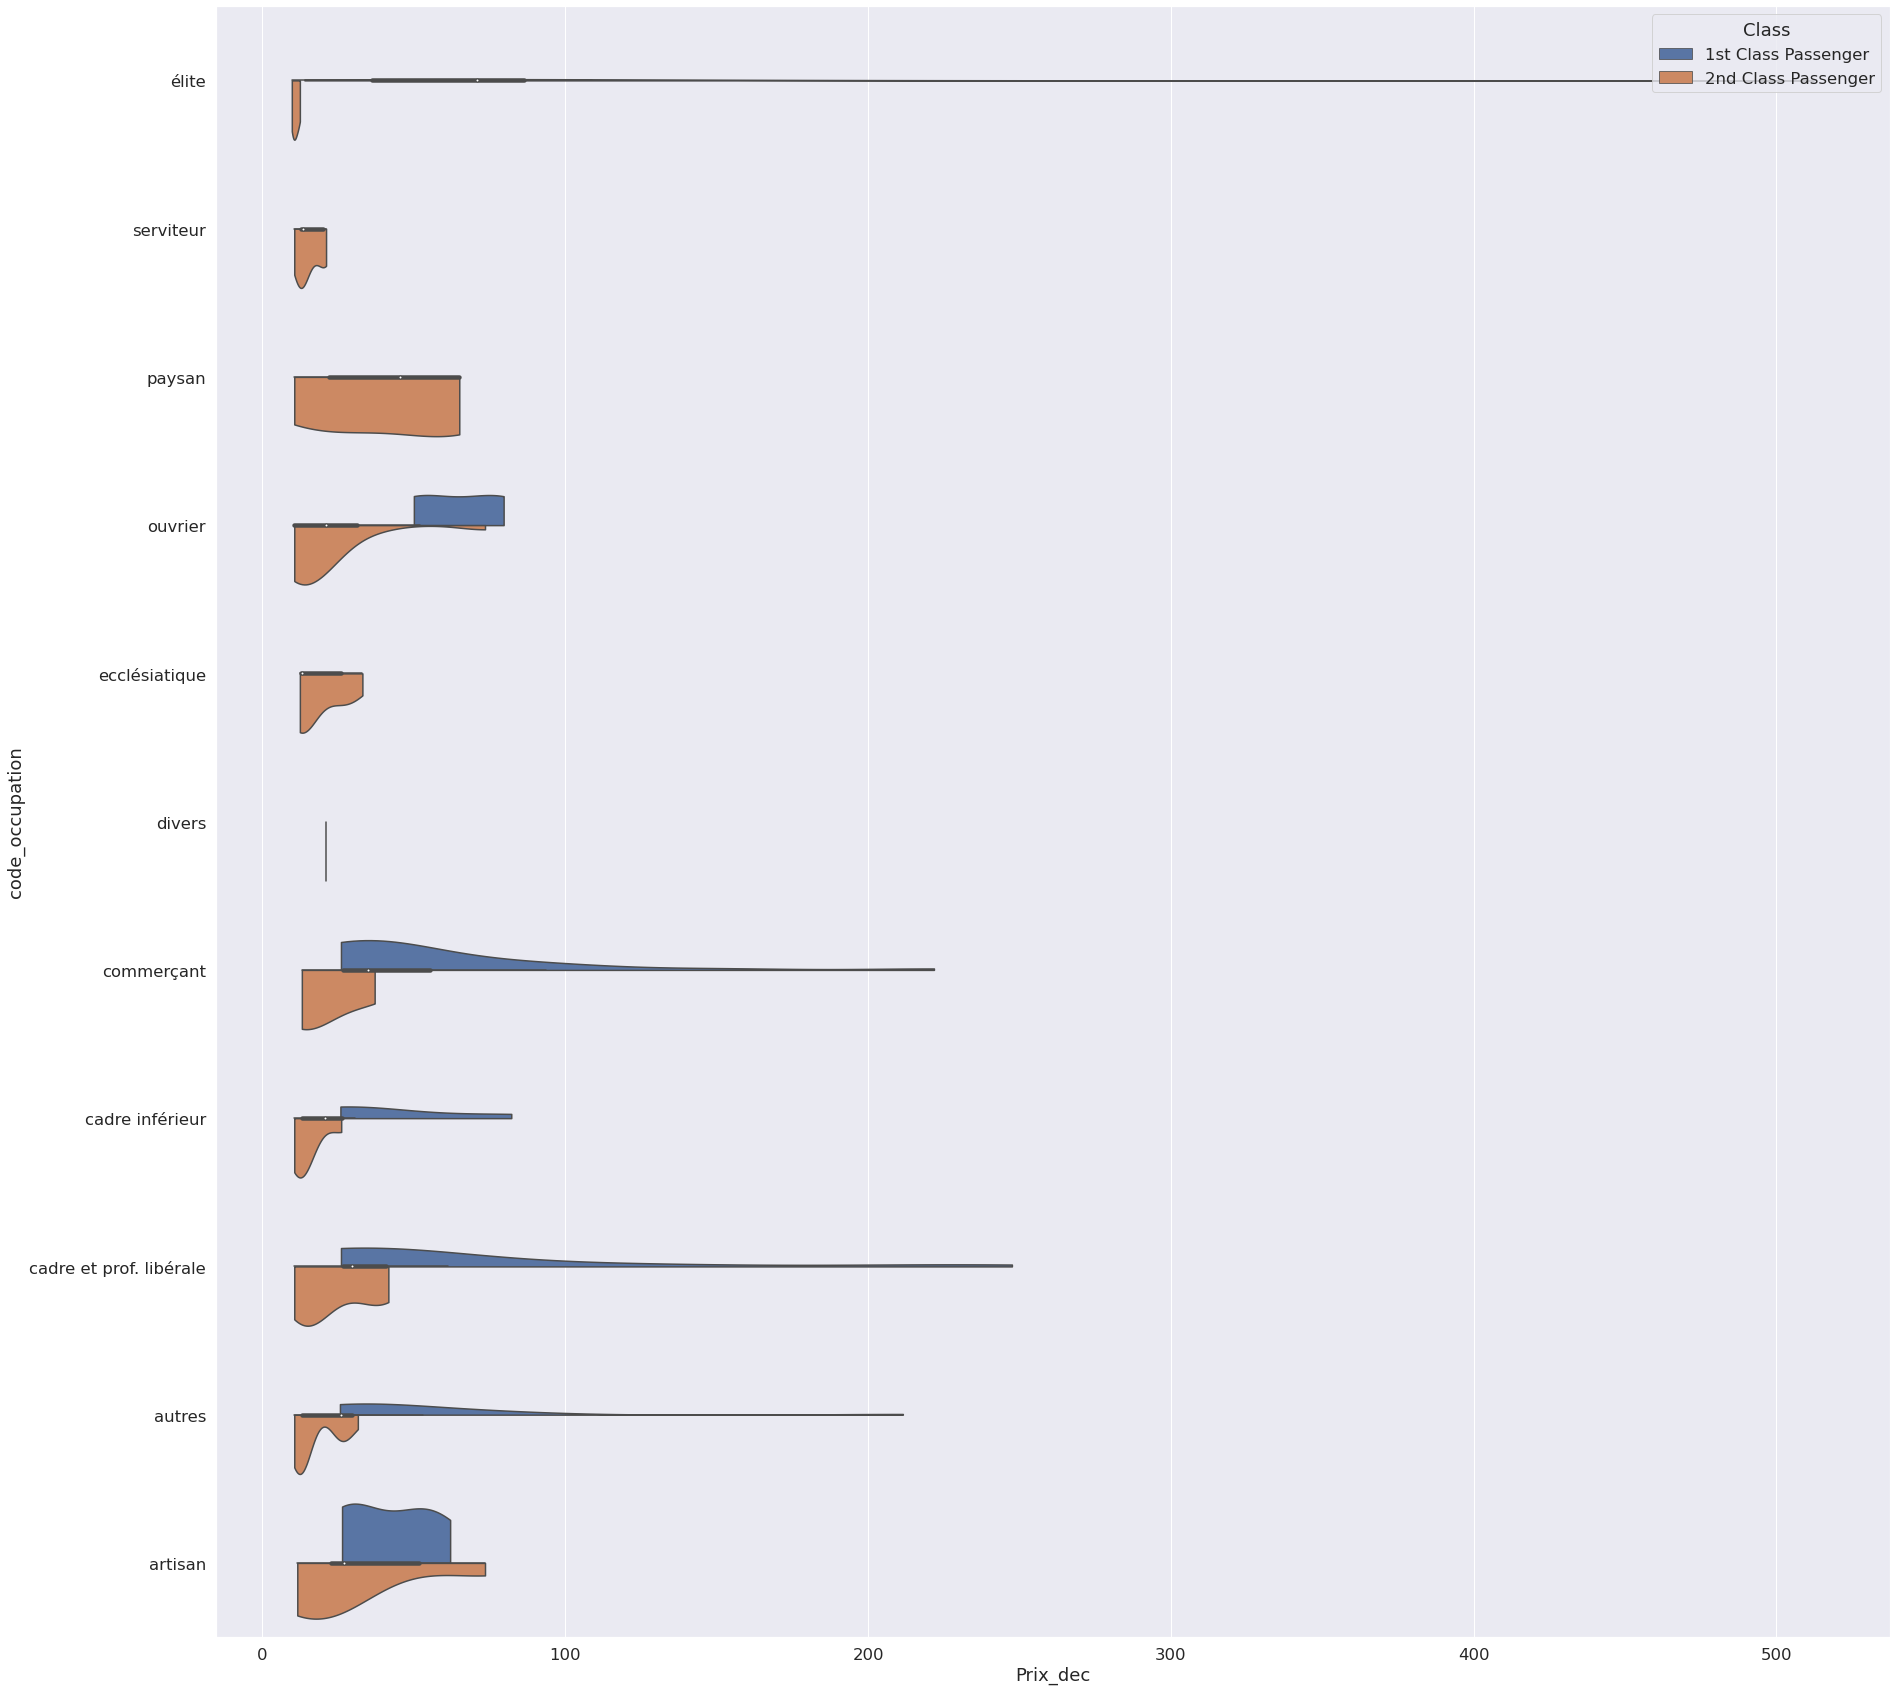

In [206]:
### comparer les classes

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 30)}, font_scale = 1.5)

ax = sns.violinplot(x='Prix_dec', y ='code_occupation', data = vcp_df_mg[vcp_df_mg.class_code.isin([1,2])]\
                    .sort_values('code_occupation',ascending=False), orient='h', hue='Class', split=True, cut=0, fontsize=18)



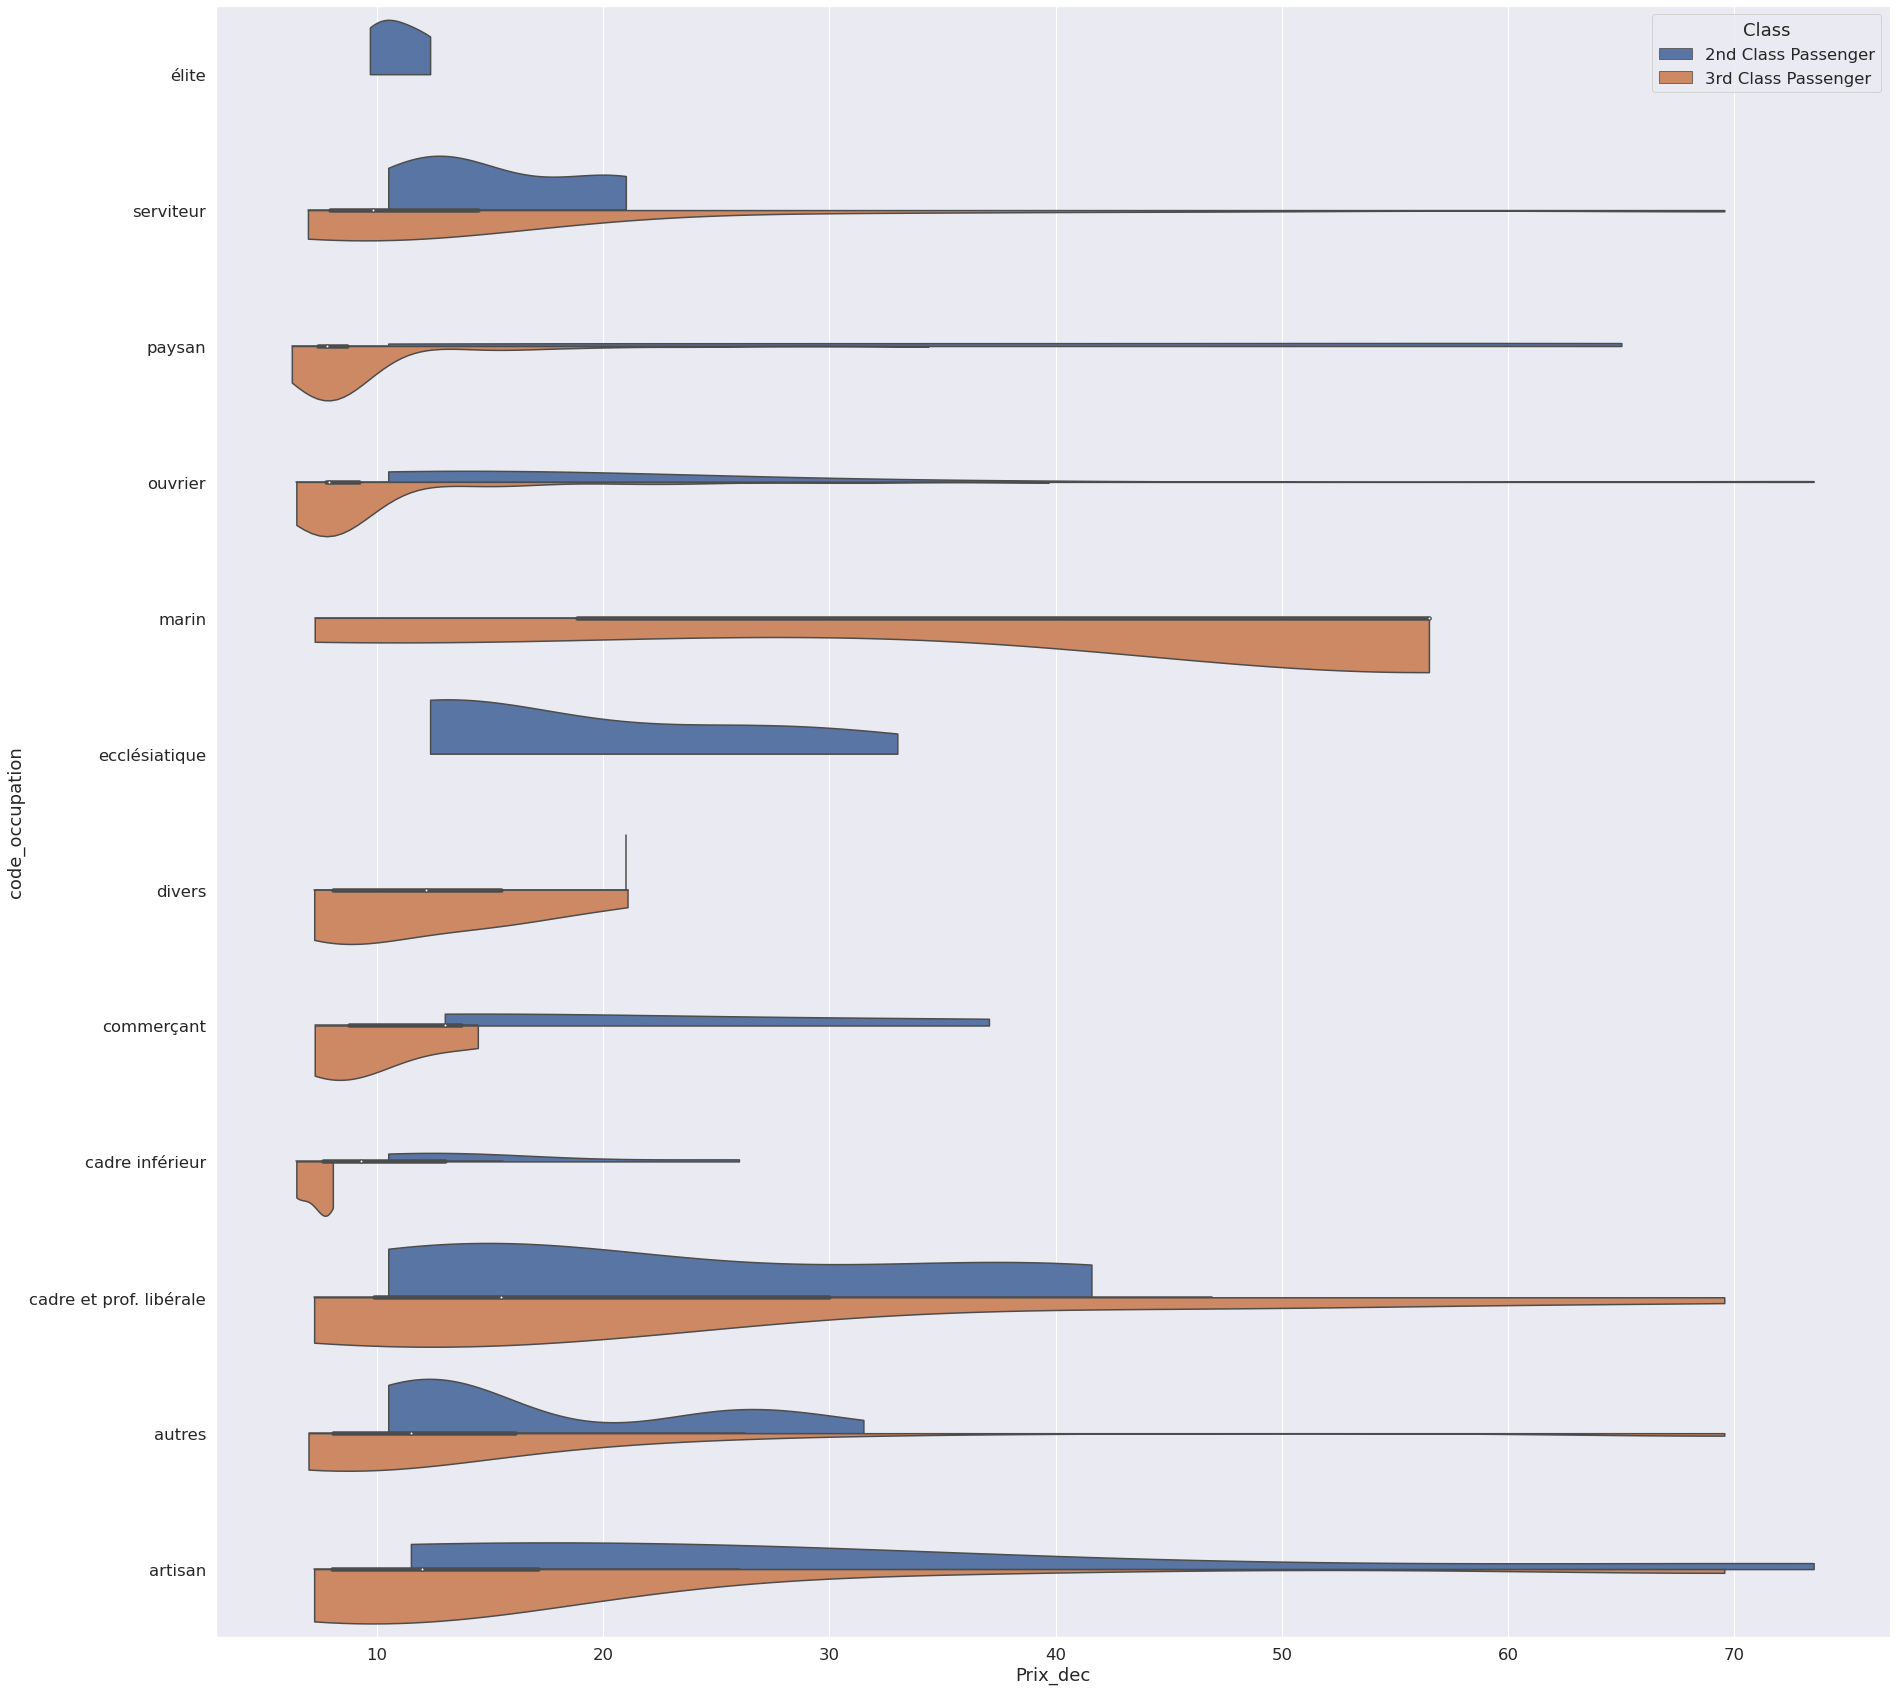

In [207]:
### comparer les classes

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 30)}, font_scale = 1.5)

ax = sns.violinplot(x='Prix_dec', y ='code_occupation', data = vcp_df_mg[vcp_df_mg.class_code.isin([3,2])]\
                    .sort_values('code_occupation',ascending=False), orient='h', hue='Class', split=True, cut=0, fontsize=18)



# Fate

In [240]:
vcp_df_mg.Fate.value_counts()

Dead        528
Survivor    107
Name: Fate, dtype: int64

In [241]:
vcp_df_mg.query("Fate == 'Dead'").Class.value_counts().sort_index()

1st Class Passenger     60
2nd Class Passenger     94
3rd Class Passenger    374
Name: Class, dtype: int64

In [242]:
vcp_df_mg.query("Fate == 'Survivor' & ~Class.str.contains('Cross')").Class.value_counts().sort_index()

1st Class Passenger    44
2nd Class Passenger    12
3rd Class Passenger    51
Name: Class, dtype: int64

In [243]:
vcp_df_mg.Class.value_counts().sort_index()

1st Class Passenger    104
2nd Class Passenger    106
3rd Class Passenger    425
Name: Class, dtype: int64

In [244]:
vcp_df_mg['class_code_str'] = vcp_df_mg['class_code'].apply(lambda x: str(x))

In [245]:
vcp_df_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635 entries, 0 to 634
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             635 non-null    object 
 1   Age              633 non-null    float64
 2   Class            635 non-null    object 
 3   Ticket           635 non-null    object 
 4   Joined           635 non-null    object 
 5   Job              635 non-null    object 
 6   Fate             635 non-null    object 
 7   Sex              635 non-null    object 
 8   Prix             635 non-null    object 
 9   Prix_dec         635 non-null    float64
 10  class_code       635 non-null    int64  
 11  code_occupation  635 non-null    object 
 12  effectif         635 non-null    int64  
 13  class_code_str   635 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 74.4+ KB


In [249]:
### Le type d'origine est 'category' il faut transformer en 'str'
##  pour éviter le message d'erreur en créant la pivot_table
vcp_df_mg['class_code_str']= passengers_df['class_code'].astype(str)

In [250]:
vcp_df_mg['class_code_str'] = passengers_df['class_code'].apply(lambda x: str(x))

In [253]:
vcp_df_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635 entries, 0 to 634
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             635 non-null    object 
 1   Age              633 non-null    float64
 2   Class            635 non-null    object 
 3   Ticket           635 non-null    object 
 4   Joined           635 non-null    object 
 5   Job              635 non-null    object 
 6   Fate             635 non-null    object 
 7   Sex              635 non-null    object 
 8   Prix             635 non-null    object 
 9   Prix_dec         635 non-null    float64
 10  class_code       635 non-null    int64  
 11  code_occupation  635 non-null    object 
 12  effectif         635 non-null    int64  
 13  class_code_str   324 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 74.4+ KB


In [254]:
vcp_df_mg.code_occupation.value_counts().sort_values()

ecclésiatique                8
divers                       9
marin                       12
cadre inférieur             16
élite                       20
artisan                     30
commerçant                  37
serviteur                   39
cadre et prof. libérale     45
paysan                      95
autres                     119
ouvrier                    205
Name: code_occupation, dtype: int64

### Tableau de contingence

In [291]:
### La fonction pivot_table produit un tableau de contingence
## Au centre du tableau se trouvent les effectifs conjoints, 
## aux bords les effectifs marginaux qui correspondent 
## aux distributions indépendantes des variables

X = "code_occupation"  # 
Y = "Fate"

pv_obs = vcp_df_mg[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
pv_obs.index = [x if x != 'Total' else 'Total' for x in pv_obs.index ]  ### x[:20] + '...' + x[-8:]
pv_obs

code_occupation,artisan,autres,cadre et prof. libérale,cadre inférieur,commerçant,divers,ecclésiatique,marin,ouvrier,paysan,serviteur,élite,Total
Dead,24,94,33,14,29,6,8,5,194,85,27,9,528
Survivor,6,25,12,2,8,3,0,7,11,10,12,11,107
Total,30,119,45,16,37,9,8,12,205,95,39,20,635


In [292]:
### Fréquence conjointe et fréquence marginale (proportion par rapport au total)

pv_obs_frequence = np.round(pv_obs*100/pv_obs.iloc[-1,-1],1)
pv_obs_frequence

code_occupation,artisan,autres,cadre et prof. libérale,cadre inférieur,commerçant,divers,ecclésiatique,marin,ouvrier,paysan,serviteur,élite,Total
Dead,3.8,14.8,5.2,2.2,4.6,0.9,1.3,0.8,30.6,13.4,4.3,1.4,83.1
Survivor,0.9,3.9,1.9,0.3,1.3,0.5,0.0,1.1,1.7,1.6,1.9,1.7,16.9
Total,4.7,18.7,7.1,2.5,5.8,1.4,1.3,1.9,32.3,15.0,6.1,3.1,100.0


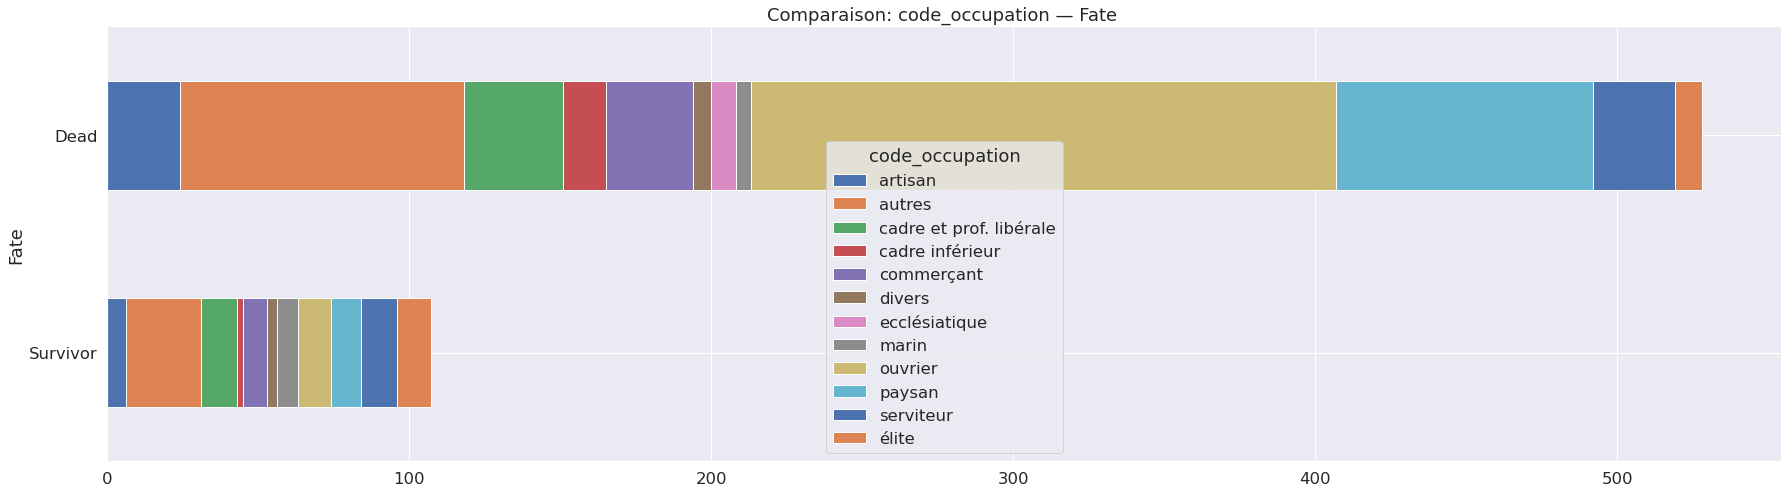

In [296]:
g = vcp_df_mg[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len) \
        .fillna(0).astype(int).sort_values(by=Y, ascending=False) \
        .plot( kind='barh', stacked=True,  figsize=(30,8),  title = f'Comparaison: {X} — {Y} ')

In [297]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

## pourcentages des lignes
stacked_data = pv_obs.apply(lambda x: x*100/sum(x)*2, axis=1) # axis=0
stacked_data

code_occupation,artisan,autres,cadre et prof. libérale,cadre inférieur,commerçant,divers,ecclésiatique,marin,ouvrier,paysan,serviteur,élite,Total
Dead,4.545455,17.803030,6.250000,2.651515,5.492424,1.136364,1.515152,0.946970,36.742424,16.098485,5.113636,1.704545,100.0
Survivor,5.607477,23.364486,11.214953,1.869159,7.476636,2.803738,0.000000,6.542056,10.280374,9.345794,11.214953,10.280374,100.0
Total,4.724409,18.740157,7.086614,2.519685,5.826772,1.417323,1.259843,1.889764,32.283465,14.960630,6.141732,3.149606,100.0


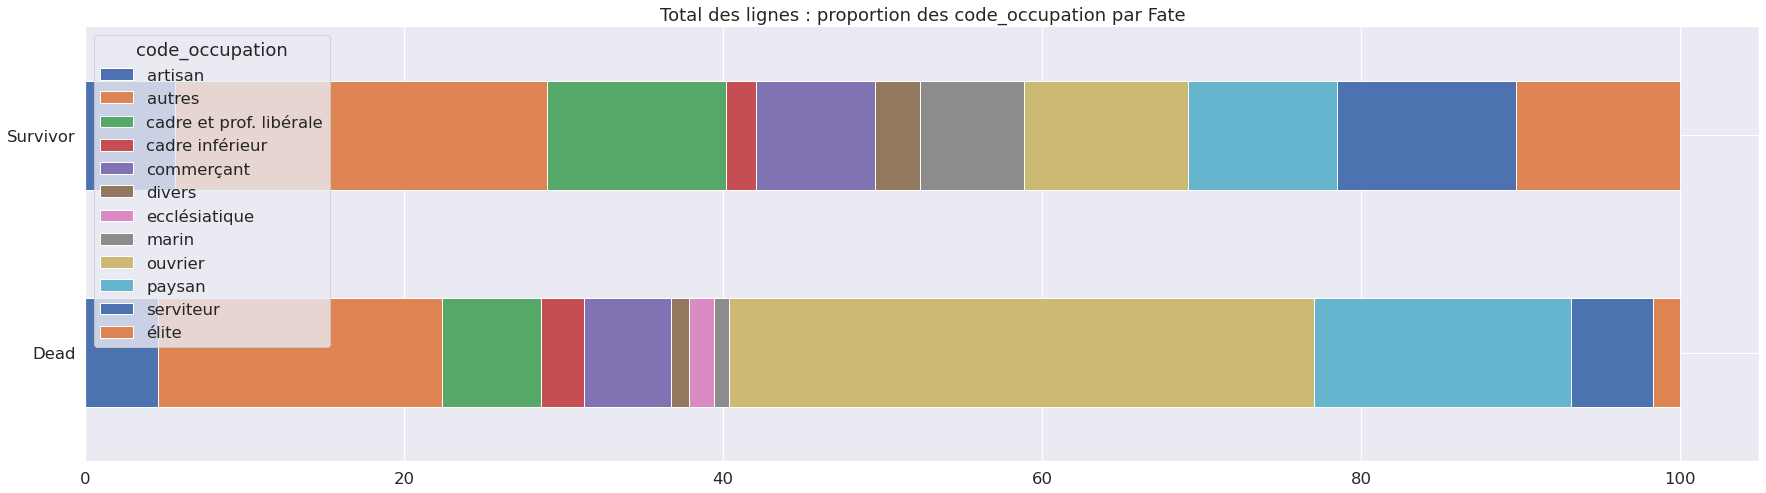

In [298]:
# print(stacked_data.iloc[0:-1, 0:-1])

#.sort_values(by=Y, ascending=False)\

plot = stacked_data.iloc[0:-1, 0:-1] \
.plot(kind="barh", stacked=True, figsize=(30,8), title=f'Total des lignes : proportion des {X} par {Y}')


In [299]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

## pourcentages des colonnes (ou des lignes après avoir interverti les variables dans le tableau)
# axis=0 à la place de axis=1
stacked_data = pv_obs.apply(lambda x: x*100/sum(x)*2, axis=0) # axis=0  1
stacked_data.transpose()

,Dead,Survivor,Total
code_occupation,,,
artisan,80.000000,20.000000,100.0
autres,78.991597,21.008403,100.0
cadre et prof. libérale,73.333333,26.666667,100.0
cadre inférieur,87.500000,12.500000,100.0
commerçant,78.378378,21.621622,100.0
divers,66.666667,33.333333,100.0
ecclésiatique,100.000000,0.000000,100.0
marin,41.666667,58.333333,100.0
ouvrier,94.634146,5.365854,100.0


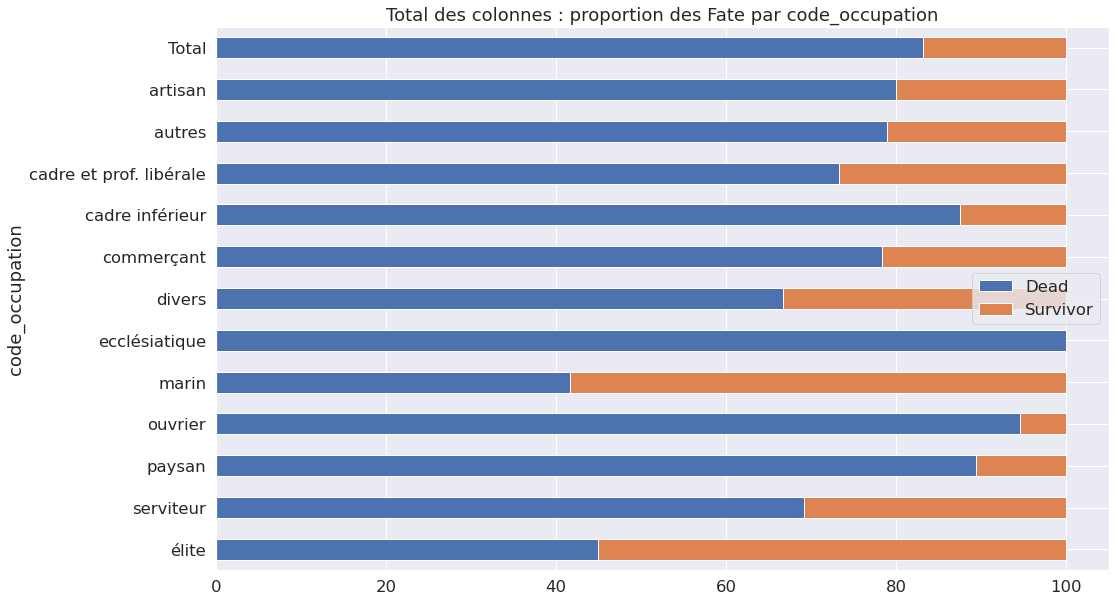

In [300]:
# print(stacked_data.iloc[0:-1, 0:])

plot = stacked_data.iloc[0:-1, 0:].transpose().sort_values(by=X, ascending=False)\
.plot(kind="barh", stacked=True, figsize=(16,10), title=f'Total des colonnes : proportion des {Y} par {X}')

### Tableau en cas d'indépendance

Produit des marges divisé par le total et arrondi

In [301]:
### Total général, dernière cellule de la dernière ligne
pv_obs.iat[-1,-1]

635

In [302]:
tx = pv_obs.loc[:,["Total"]]
ty = pv_obs.loc[["Total"],:]
n = pv_obs.iat[-1,-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
print(indep.astype(int))


code_occupation  artisan  autres  cadre et prof. libérale  cadre inférieur  \
Dead                  24      98                       37               13   
Survivor               5      20                        7                2   
Total                 30     119                       45               16   

code_occupation  commerçant  divers  ecclésiatique  marin  ouvrier  paysan  \
Dead                     30       7              6      9      170      78   
Survivor                  6       1              1      2       34      16   
Total                    37       9              8     12      205      95   

code_occupation  serviteur  élite  Total  
Dead                    32     16    528  
Survivor                 6      3    107  
Total                   39     20    635  


In [303]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (pv_obs-indep).iloc[:-1,:-1]
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.astype(int))


code_occupation  artisan  autres  cadre et prof. libérale  cadre inférieur  \
Dead                   0      -4                       -4                0   
Survivor               0       4                        4                0   

code_occupation  commerçant  divers  ecclésiatique  marin  ouvrier  paysan  \
Dead                     -1      -1              1     -4       23       6   
Survivor                  1       1             -1      4      -23      -6   

code_occupation  serviteur  élite  
Dead                    -5     -7  
Survivor                 5      7  


In [304]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = (pv_obs-indep)**2/indep
ecarts_ponderes.iloc[:-1,:-1]

code_occupation,artisan,autres,cadre et prof. libérale,cadre inférieur,commerçant,divers,ecclésiatique,marin,ouvrier,paysan,serviteur,élite
Dead,0.035791,0.247433,0.521490,0.036418,0.101298,0.294071,0.273181,2.483477,3.251778,0.456939,0.908679,3.500660
Survivor,0.176613,1.220978,2.573331,0.179708,0.499864,1.451115,1.348031,12.254913,16.046156,2.254800,4.483947,17.274284


71.87495486690986


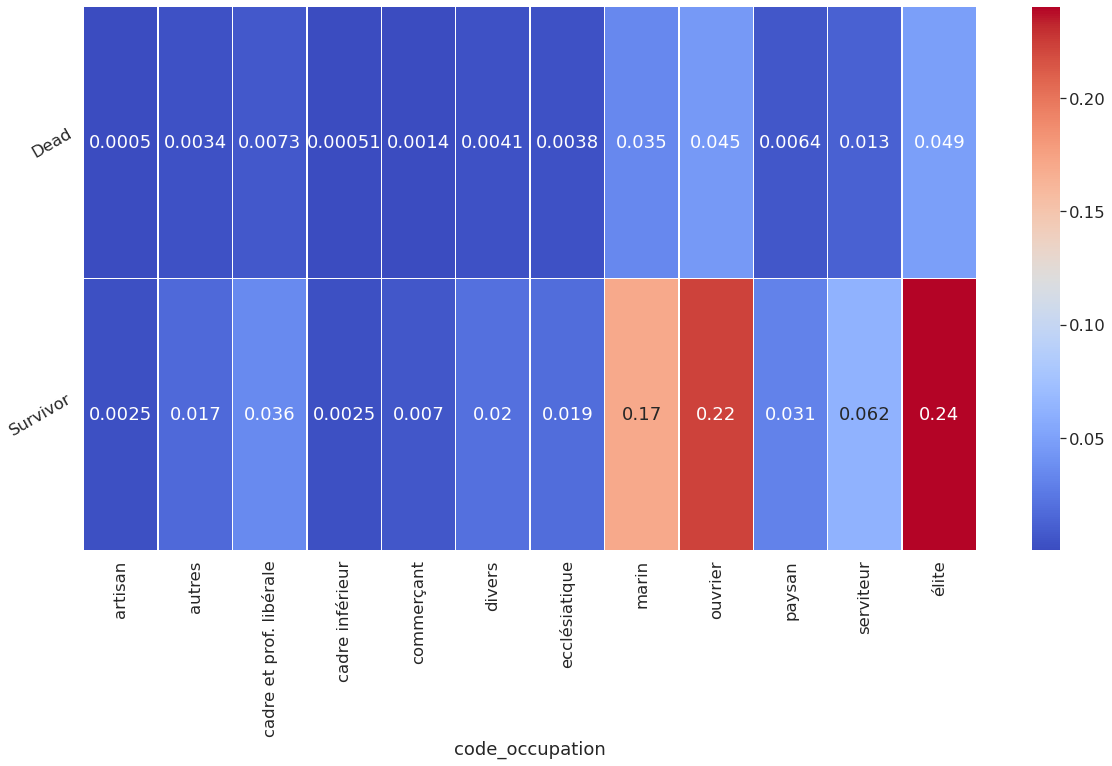

In [305]:
xi_n = ecarts_ponderes.sum().sum()
print(xi_n)


tableau = ecarts_ponderes.iloc[:-1,:-1]/xi_n
fig, ax = plt.subplots(figsize=(20,10))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

In [306]:
vcp_df_mg.head()

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix,Prix_dec,class_code,code_occupation,effectif,class_code_str
0,"ABBING, Mr Anthony",42.0,3rd Class Passenger,5547\r\n£7 11s,Southampton,Blacksmith,Dead,M,£7 11s,7.550,3,artisan,3,NaN
1,"DAVISON, Mr Thomas Henry",32.0,3rd Class Passenger,386525\r\n£16 2s,Southampton,Blacksmith,Dead,M,£16 2s,16.100,3,artisan,3,3
2,"FORD, Mr Edward Watson",18.0,3rd Class Passenger,6608\r\n£34 7s 6d,Southampton,Blacksmith,Dead,M,£34 7s 6d,34.375,3,artisan,3,NaN
3,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,Scholar,Dead,M,£20 5s,20.250,3,cadre et prof. libérale,7,3
4,"BROWN, Miss Edith Eileen",15.0,2nd Class Passenger,29750\r\n£39,Southampton,Scholar,Survivor,F,£39,39.000,2,cadre et prof. libérale,7,3


## Croiser code occupation et classe d'embarquement

In [307]:
### La fonction pivot_table produit un tableau de contingence
## Au centre du tableau se trouvent les effectifs conjoints, 
## aux bords les effectifs marginaux qui correspondent 
## aux distributions indépendantes des variables

X = "code_occupation"  # qualif  trav.satisf  relig occup sexe
Y = "Class" # sexe nivetud

### https://towardsdatascience.com/how-to-drop-rows-in-pandas-dataframes-with-nan-values-in-certain-columns-7613ad1a7f25
# obs1 = obs.dropna(subset=[X,Y])
# obs1 = obs.dropna(subset=[X,Y])[obs['sexe']=='Femme']


pv_obs = vcp_df_mg[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
pv_obs.index = [x[:20] + '...' + x[-8:] if x != 'Total' else 'Total' for x in pv_obs.index ]
pv_obs

code_occupation,artisan,autres,cadre et prof. libérale,cadre inférieur,commerçant,divers,ecclésiatique,marin,ouvrier,paysan,serviteur,élite,Total
1st Class Passenger...assenger,6,22,21,4,30,0,0,0,4,0,0,17,104
2nd Class Passenger...assenger,6,39,9,6,3,1,8,0,19,4,8,3,106
3rd Class Passenger...assenger,18,58,15,6,4,8,0,12,182,91,31,0,425
Total,30,119,45,16,37,9,8,12,205,95,39,20,635


In [308]:
### Fréquence conjointe et fréquence marginale (proportion par rapport au total)

pv_obs_frequence = np.round(pv_obs*100/pv_obs.iloc[-1,-1],1)
pv_obs_frequence

code_occupation,artisan,autres,cadre et prof. libérale,cadre inférieur,commerçant,divers,ecclésiatique,marin,ouvrier,paysan,serviteur,élite,Total
1st Class Passenger...assenger,0.9,3.5,3.3,0.6,4.7,0.0,0.0,0.0,0.6,0.0,0.0,2.7,16.4
2nd Class Passenger...assenger,0.9,6.1,1.4,0.9,0.5,0.2,1.3,0.0,3.0,0.6,1.3,0.5,16.7
3rd Class Passenger...assenger,2.8,9.1,2.4,0.9,0.6,1.3,0.0,1.9,28.7,14.3,4.9,0.0,66.9
Total,4.7,18.7,7.1,2.5,5.8,1.4,1.3,1.9,32.3,15.0,6.1,3.1,100.0


In [309]:
### Total général, dernière cellule de la dernière ligne
pv_obs.iat[-1,-1]

635

In [310]:
tx = pv_obs.loc[:,["Total"]]
ty = pv_obs.loc[["Total"],:]
n = pv_obs.iat[-1,-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
print(indep.astype(int))


code_occupation                 artisan  autres  cadre et prof. libérale  \
1st Class Passenger...assenger        4      19                        7   
2nd Class Passenger...assenger        5      19                        7   
3rd Class Passenger...assenger       20      79                       30   
Total                                30     119                       45   

code_occupation                 cadre inférieur  commerçant  divers  \
1st Class Passenger...assenger                2           6       1   
2nd Class Passenger...assenger                2           6       1   
3rd Class Passenger...assenger               10          24       6   
Total                                        16          37       9   

code_occupation                 ecclésiatique  marin  ouvrier  paysan  \
1st Class Passenger...assenger              1      1       33      15   
2nd Class Passenger...assenger              1      2       34      15   
3rd Class Passenger...assenger              

In [311]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (pv_obs-indep).iloc[:-1,:-1]
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.astype(int))


code_occupation                 artisan  autres  cadre et prof. libérale  \
1st Class Passenger...assenger        1       2                       13   
2nd Class Passenger...assenger        0      19                        1   
3rd Class Passenger...assenger       -2     -21                      -15   

code_occupation                 cadre inférieur  commerçant  divers  \
1st Class Passenger...assenger                1          23      -1   
2nd Class Passenger...assenger                3          -3       0   
3rd Class Passenger...assenger               -4         -20       1   

code_occupation                 ecclésiatique  marin  ouvrier  paysan  \
1st Class Passenger...assenger             -1     -1      -29     -15   
2nd Class Passenger...assenger              6     -2      -15     -11   
3rd Class Passenger...assenger             -5      3       44      27   

code_occupation                 serviteur  élite  
1st Class Passenger...assenger         -6     13  
2nd Class Passe

In [312]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = (pv_obs-indep)**2/indep
ecarts_ponderes.iloc[:-1,:-1]

code_occupation,artisan,autres,cadre et prof. libérale,cadre inférieur,commerçant,divers,ecclésiatique,marin,ouvrier,paysan,serviteur,élite
1st Class Passenger...assenger,0.240309,0.323313,25.206617,0.726242,94.578554,1.474016,1.310236,1.965354,26.051351,15.559055,6.387402,57.503956
2nd Class Passenger...assenger,0.196553,18.433062,0.294830,4.149640,1.633543,0.167981,33.259961,2.003150,6.769713,8.867205,0.340909,0.034337
3rd Class Passenger...assenger,0.215211,5.882743,7.588698,2.070426,17.409884,0.648459,5.354331,1.960908,14.624983,11.822553,0.918953,13.385827


389.36026374984635


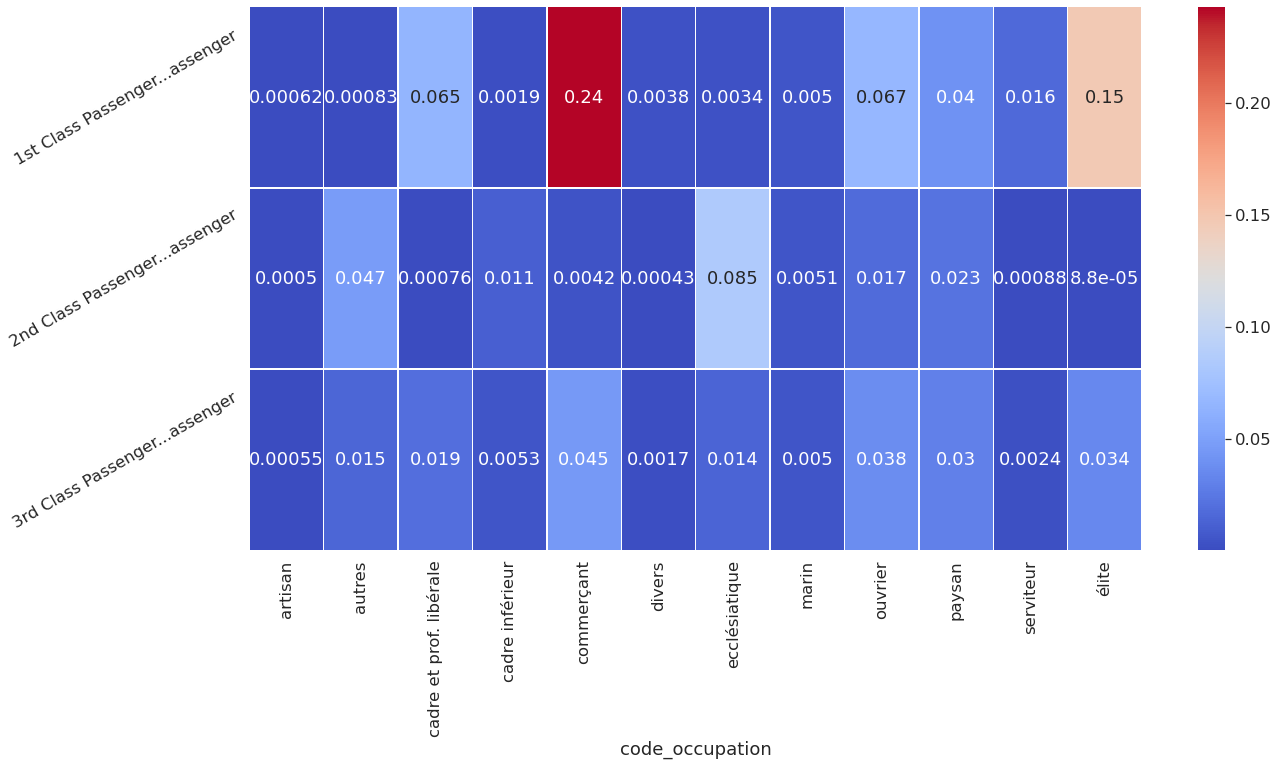

In [313]:
xi_n = ecarts_ponderes.sum().sum()
print(xi_n)


tableau = ecarts_ponderes.iloc[:-1,:-1]/xi_n
fig, ax = plt.subplots(figsize=(20,10))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

## Croiser classe d'embarquement + genre et sort

In [331]:
passengers_df.head()

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix,Prix_dec,class_code,class_code_str
new_col,,,,,,,,,,,,
1,"ABBING, Mr Anthony",42.0,3rd Class Passenger,5547\r\n£7 11s,Southampton,Blacksmith,Dead,M,£7 11s,7.55,3,3
3,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,Scholar,Dead,M,£20 5s,20.25,3,3
4,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,Jeweller,Dead,M,£20 5s,20.25,3,3
5,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,,Survivor,F,£20 5s,20.25,3,3
6,"ABELSETH, Miss Karen Marie",16.0,3rd Class Passenger,348125\r\n£7 13s,Southampton,,Survivor,F,£7 13s,7.65,3,3


### Tous

In [340]:
### La fonction pivot_table produit un tableau de contingence
## Au centre du tableau se trouvent les effectifs conjoints, 
## aux bords les effectifs marginaux qui correspondent 
## aux distributions indépendantes des variables

X = "Class"  # qualif  trav.satisf  relig occup sexe
Y = "Fate" # sexe nivetud

### https://towardsdatascience.com/how-to-drop-rows-in-pandas-dataframes-with-nan-values-in-certain-columns-7613ad1a7f25
# obs1 = obs.dropna(subset=[X,Y])
# obs1 = obs.dropna(subset=[X,Y])[obs['sexe']=='Femme']


pv_obs = passengers_df[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
pv_obs.index = [x[:20] + '...' + x[-8:] if x != 'Total' else 'Total' for x in pv_obs.index ]
pv_obs

Class,1st Class Passenger,2nd Class Passenger,3rd Class Passenger,Total
Dead...Dead,109,148,507,764
Survivor...Survivor,172,117,197,486
Total,281,265,704,1250


In [341]:
### Fréquence conjointe et fréquence marginale (proportion par rapport au total)

pv_obs_frequence = np.round(pv_obs*100/pv_obs.iloc[-1,-1],1)
pv_obs_frequence

Class,1st Class Passenger,2nd Class Passenger,3rd Class Passenger,Total
Dead...Dead,8.7,11.8,40.6,61.1
Survivor...Survivor,13.8,9.4,15.8,38.9
Total,22.5,21.2,56.3,100.0


In [342]:
### Total général, dernière cellule de la dernière ligne
pv_obs.iat[-1,-1]

1250

In [343]:
tx = pv_obs.loc[:,["Total"]]
ty = pv_obs.loc[["Total"],:]
n = pv_obs.iat[-1,-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
print(indep.astype(int))


Class                1st Class Passenger  2nd Class Passenger  \
Dead...Dead                          171                  161   
Survivor...Survivor                  109                  103   
Total                                281                  265   

Class                3rd Class Passenger  Total  
Dead...Dead                          430    764  
Survivor...Survivor                  273    486  
Total                                704   1250  


In [344]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (pv_obs-indep).iloc[:-1,:-1]
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.astype(int))


Class                1st Class Passenger  2nd Class Passenger  \
Dead...Dead                          -62                  -13   
Survivor...Survivor                   62                   13   

Class                3rd Class Passenger  
Dead...Dead                           76  
Survivor...Survivor                  -76  


In [345]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = (pv_obs-indep)**2/indep
ecarts_ponderes.iloc[:-1,:-1]

Class,1st Class Passenger,2nd Class Passenger,3rd Class Passenger
Dead...Dead,22.924456,1.204590,13.677504
Survivor...Survivor,36.037622,1.893635,21.501261


97.23906749155488


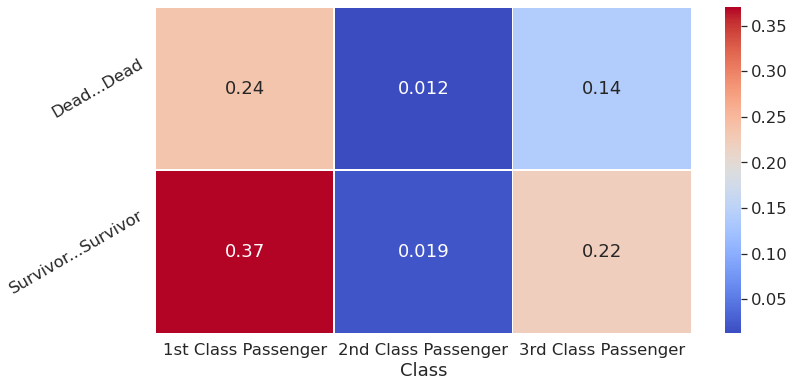

In [348]:
xi_n = ecarts_ponderes.sum().sum()
print(xi_n)


tableau = ecarts_ponderes.iloc[:-1,:-1]/xi_n
fig, ax = plt.subplots(figsize=(12, 6))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

### En séparant le genres

In [ ]:
passengers_df['class_gender'] = passengers_df.apply(lambda x: str(x['class_code']) + '_' + x['Sex'], axis=1)
passengers_df.tail()

/tmp/ipykernel_130129/1232937850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passengers_df['class_gender'] = passengers_df.apply(lambda x: str(x['class_code']) + '_' + x['Sex'], axis=1)


,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix,Prix_dec,class_code,class_code_str,class_gender
new_col,,,,,,,,,,,,,
2451,"ABĪ ĀSĪ ḤANNĀ, Mr Mansūr",27.0,3rd Class Passenger,2663\r\n£7 4s 7d,Cherbourg,,Survivor,M,£7 4s 7d,7.229,3,3,3_M
2452,"ØSTBY, Miss Helen Ragnhild",22.0,1st Class Passenger,113509\r\n£61 19s 7d,Southampton,,Survivor,F,£61 19s 7d,61.979,1,1,1_F
2453,"ÖDAHL, Mr Nils Martin",23.0,3rd Class Passenger,7267\r\n£9 4s 6d,Southampton,General Labourer,Dead,M,£9 4s 6d,9.225,3,3,3_M
2454,"ÖHMAN, Miss Velin",22.0,3rd Class Passenger,347085\r\n£7 15s 6d,Southampton,,Survivor,F,£7 15s 6d,7.775,3,3,3_F
2455,"āDAH, Mr Mauritz",30.0,3rd Class Passenger,7076\r\n£7 5s,Southampton,General Labourer,Dead,M,£7 5s,7.250,3,3,3_M


In [333]:
### La fonction pivot_table produit un tableau de contingence
## Au centre du tableau se trouvent les effectifs conjoints, 
## aux bords les effectifs marginaux qui correspondent 
## aux distributions indépendantes des variables

X = "class_gender"  # qualif  trav.satisf  relig occup sexe
Y = "Fate" # sexe nivetud

### https://towardsdatascience.com/how-to-drop-rows-in-pandas-dataframes-with-nan-values-in-certain-columns-7613ad1a7f25
# obs1 = obs.dropna(subset=[X,Y])
# obs1 = obs.dropna(subset=[X,Y])[obs['sexe']=='Femme']


pv_obs = passengers_df[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
pv_obs.index = [x[:20] + '...' + x[-8:] if x != 'Total' else 'Total' for x in pv_obs.index ]
pv_obs

class_gender,1_F,1_M,2_F,2_M,3_F,3_M,Total
Dead...Dead,5,104,12,136,107,400,764
Survivor...Survivor,113,59,93,24,100,97,486
Total,118,163,105,160,207,497,1250


In [334]:
### Fréquence conjointe et fréquence marginale (proportion par rapport au total)

pv_obs_frequence = np.round(pv_obs*100/pv_obs.iloc[-1,-1],1)
pv_obs_frequence

class_gender,1_F,1_M,2_F,2_M,3_F,3_M,Total
Dead...Dead,0.4,8.3,1.0,10.9,8.6,32.0,61.1
Survivor...Survivor,9.0,4.7,7.4,1.9,8.0,7.8,38.9
Total,9.4,13.0,8.4,12.8,16.6,39.8,100.0


In [335]:
### Total général, dernière cellule de la dernière ligne
pv_obs.iat[-1,-1]

1250

In [336]:
tx = pv_obs.loc[:,["Total"]]
ty = pv_obs.loc[["Total"],:]
n = pv_obs.iat[-1,-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
print(indep.astype(int))


class_gender         1_F  1_M  2_F  2_M  3_F  3_M  Total
Dead...Dead           72   99   64   97  126  303    764
Survivor...Survivor   45   63   40   62   80  193    486
Total                118  163  105  160  207  497   1250


In [337]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (pv_obs-indep).iloc[:-1,:-1]
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.astype(int))


class_gender         1_F  1_M  2_F  2_M  3_F  3_M
Dead...Dead          -67    4  -52   38  -19   96
Survivor...Survivor   67   -4   52  -38   19  -96


In [338]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = (pv_obs-indep)**2/indep
ecarts_ponderes.iloc[:-1,:-1]

class_gender,1_F,1_M,2_F,2_M,3_F,3_M
Dead...Dead,62.468237,0.192073,42.419829,14.928126,3.011166,30.486933
Survivor...Survivor,98.201097,0.301942,66.684670,23.467259,4.733603,47.925960


394.8208942346257


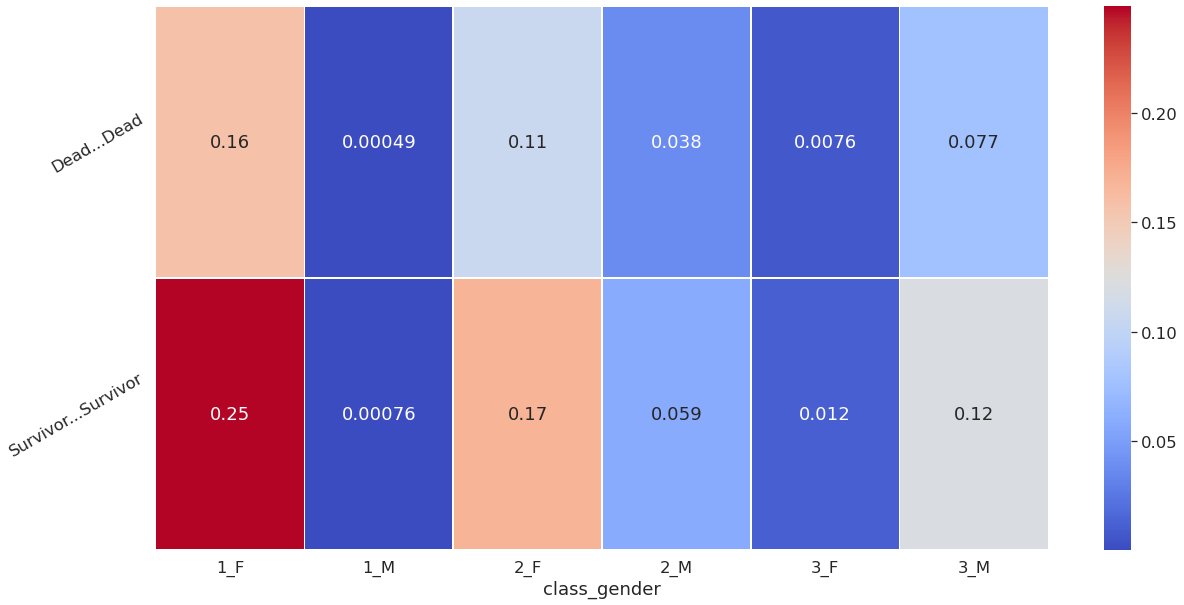

In [339]:
xi_n = ecarts_ponderes.sum().sum()
print(xi_n)


tableau = ecarts_ponderes.iloc[:-1,:-1]/xi_n
fig, ax = plt.subplots(figsize=(20,10))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)